# Project 2: Ames Housing Sale Price Prediction

## Problem Statement

Century 21 Real Estate LLC is looking to improve their digital brokerage consultancy services, by providing recommendations to house sellers on potential value of their house and things they could do to increase the value of their house. Consequently, Century 21 can benefit from higher sale prices and transactions from house sellers and investors.   

This report seeks to provide recommendations on the features that are most influential on the sale price of the houses in Ames, Iowa, through exploratory analysis on the comprehensive Ames housing dataset from 2006 -2010, and development of a multiple regression model that seeks to be able to provide good prediction accuracy while preserving generalizability. The performance of the models will be evaluated using the R-square metric, which indicates how much variation of the housing sale price is explained by the features in the regression model, with a success criteria of >90%. 

## Executive Summary

Four regression learning algorithms were evaluated in their predictive performance on housing sale price in Ames, USA. The ElasticNet regression model had the best predictive performance with a R-square of 91.9% and was able to identify the top features which impact sale price of houses in Ames.

**Overall quality** of the house in terms of material and finish, and above ground **living area and basement area (sq ft)** appear to add the most value to a home. Conversely, the **age of the property** and **Mansard roof style** appear to hurt the value of a home the most.

For home owners, they could consider the following to increase the value of their homes:

- renovating or remodelling the interior and exterior house to improve overall finish quality
- refurbishing the kitchen to improve its quality
- having a quality fireplace which would come in handy during winter season

For someone looking to buy a house for investment, they could consider looking at houses in the **Northridge Hts and Stone Brook neighbourhoods** which fetch higher sale value compared to the other neighbourhoods. In addition, houses located within **proximity of green belt, parks or amenities etc, and hilly terrain** would fetch higher prices as well.

To make the prediction model applicability more universal, the model could be revised to remove those specific features which only apply to Ames, e.g. neighbourhoods or engineering more universal features from the data. The model could also be enriched by collecting data from other cities in the same timeframe so that comparative analysis could be made.


### Contents:
- [Data Cleaning](#Data-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Pre-processing & Feature Engineering](#Pre-processing-&-Feature-Engineering)
- [Modelling](#Modelling)
- [Kaggle Submission](#Kaggle-Submission)
- [Conclusion & Recommendations](#Conclusion-&-Recommendations)

In [333]:
# import libraries
import numpy as np
import pandas as pd

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.dummy import DummyRegressor

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

pd.set_option('display.max_columns', None)

In [334]:
# import training data:
df_train = pd.read_csv('../datasets/train.csv')
df_train.head(10)

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0   109  533352170           60        RL           NaN     13517   Pave   
1   544  531379050           60        RL          43.0     11492   Pave   
2   153  535304180           20        RL          68.0      7922   Pave   
3   318  916386060           60        RL          73.0      9802   Pave   
4   255  906425045           50        RL          82.0     14235   Pave   
5   138  535126040           20        RL         137.0     16492   Pave   
6  2827  908186070          180        RM          35.0      3675   Pave   
7   145  535154050           20        RL           NaN     12160   Pave   
8  1942  535353130           20        RL           NaN     15783   Pave   
9  1956  535426130           60        RL          70.0     11606   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0   NaN       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1   NaN       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2   NaN       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3   NaN       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4   NaN       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   
5   NaN       IR1          Lvl    AllPub     Corner        Gtl        NAmes   
6   NaN       Reg          Lvl    AllPub     Inside        Gtl      Edwards   
7   NaN       IR1          Lvl    AllPub     Inside        Gtl        NAmes   
8   NaN       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
9   NaN       IR1          HLS    AllPub     Inside        Sev        NAmes   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   
5        PosA        Norm      1Fam      1Story             6             6   
6        Norm        Norm    TwnhsE      SFoyer             6             5   
7        Norm        Norm      1Fam      1Story             5             5   
8      Artery        Norm      1Fam      1Story             5             5   
9        Norm        Norm      1Fam      2Story             5             5   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   
5        1966            2002      Gable   CompShg      BrkFace      Plywood   
6        2005            2006      Gable   CompShg      VinylSd      VinylSd   
7        1959            1959        Hip   CompShg      Plywood      Plywood   
8        1952            1952      Gable   CompShg      Wd Sdng      Wd Sdng   
9        1969            1969      Gable   CompShg      Plywood      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   
5         None           0.0         Gd         TA     CBlock        TA   
6      BrkFace        

In [335]:
df_train.shape

(2051, 81)

## Data Cleaning

In [336]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [337]:
# Ensure Id is unique
len(df_train['Id'].unique())

2051

In [338]:
# make column names lower case and remove spaces
df_train.columns = df_train.columns.str.lower()
df_train.columns = df_train.columns.str.replace(' ','_')

df_train.head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  lot_shape land_contour utilities lot_config land_slope neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   year_built  year_remod/add roof_style roof_matl exterior_1st exterior_2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation bsmt_qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2  

In [339]:
df_train.describe().T

count          mean           std          min          25%  \
id               2051.0  1.474034e+03  8.439808e+02          1.0        753.5   
pid              2051.0  7.135900e+08  1.886918e+08  526301100.0  528458140.0   
ms_subclass      2051.0  5.700878e+01  4.282422e+01         20.0         20.0   
lot_frontage     1721.0  6.905520e+01  2.326065e+01         21.0         58.0   
lot_area         2051.0  1.006521e+04  6.742489e+03       1300.0       7500.0   
overall_qual     2051.0  6.112140e+00  1.426271e+00          1.0          5.0   
overall_cond     2051.0  5.562165e+00  1.104497e+00          1.0          5.0   
year_built       2051.0  1.971709e+03  3.017789e+01       1872.0       1953.5   
year_remod/add   2051.0  1.984190e+03  2.103625e+01       1950.0       1964.5   
mas_vnr_area     2029.0  9.969591e+01  1.749631e+02          0.0          0.0   
bsmtfin_sf_1     2050.0  4.423005e+02  4.612041e+02          0.0          0.0   
bsmtfin_sf_2     2050.0  4.795902e+01  1.650009e+02          0.0          0.0   
bsmt_unf_sf      2050.0  5.677283e+02  4.449548e+02          0.0        220.0   
total_bsmt_sf    2050.0  1.057988e+03  4.494107e+02          0.0        793.0   
1st_flr_sf       2051.0  1.164488e+03  3.964469e+02        334.0        879.5   
2nd_flr_sf       2051.0  3.293291e+02  4.256710e+02          0.0          0.0   
low_qual_fin_sf  2051.0  5.512921e+00  5.106887e+01          0.0          0.0   
gr_liv_area      2051.0  1.499330e+03  5.004478e+02        334.0       1129.0   
bsmt_full_bath   2049.0  4.275256e-01  5.226732e-01          0.0          0.0   
bsmt_half_bath   2049.0  6.344558e-02  2.517052e-01          0.0          0.0   
full_bath        2051.0  1.577279e+00  5.492794e-01          0.0          1.0   
half_bath        2051.0  3.710385e-01  5.010427e-01          0.0          0.0   
bedroom_abvgr    2051.0  2.843491e+00  8.266183e-01          0.0          2.0   
kitchen_abvgr    2051.0  1.042906e+00  2.097900e-01          0.0          1.0   
totrms_abvgrd    2051.0  6.435885e+00  1.560225e+00          2.0          5.0   
fireplaces       2051.0  5.909313e-01  6.385163e-01          0.0          0.0   
garage_yr_blt    1937.0  1.978708e+03  2.544109e+01       1895.0       1961.0   
garage_cars      2050.0  1.776585e+00  7.645374e-01          0.0          1.0   
garage_area      2050.0  4.736717e+02  2.159346e+02          0.0        319.0   
wood_deck_sf     2051.0  9.383374e+01  1.285494e+02          0.0          0.0   
open_porch_sf    2051.0  4.755680e+01  6.674724e+01          0.0          0.0   
enclosed_porch   2051.0  2.257192e+01  5.984511e+01          0.0          0.0   
3ssn_porch       2051.0  2.591419e+00  2.522961e+01          0.0          0.0   
screen_porch     2051.0  1.651146e+01  5.737420e+01          0.0          0.0   
pool_area        2051.0  2.397855e+00  3.778257e+01          0.0          0.0   
misc_val         2051.0  5.157435e+01  5.733940e+02          0.0          0.0   
mo_sold          2051.0  6.219893e+00  2.744736e+00          1.0          4.0   
yr_sold          2051.0  2.007776e+03  1.312014e+00       2006.0       2007.0   
saleprice        2051.0  1.814697e+05  7.925866e+04      12789.0     129825.0   

                         50%           75%          max  
id                    1486.0  2.198000e+03       2930.0  
pid              535453200.0  9.071801e+08  924152030.0  
ms_subclass             50.0  7.000000e+01        190.0  
lot_frontage            68.0  8.000000e+01        313.0  
lot_area              9430.0  1.151350e+04     159000.0  
overall_qual             6.0  7.000000e+00         10.0  
overall_cond             5.0  6.000000e+00          9.0  
year_built            1974.0  2.001000e+03       2010.0  
year_remod/add        1993.0  2.004000e+03       2010.0  
mas_vnr_area             0.0  1.610000e+02       1600.0  
bsmtfin_sf_1           368.0  7.337500e+02       5644.0  
bsmtfin_sf_2             0.0  0.000000e+00       1474.0  
bsmt_unf_sf            

### Impute null values

In [340]:
# Identify columns with nulls
df_null = pd.DataFrame(df_train.isnull().sum(), columns=['null_count'])
df_null = df_null[df_null['null_count'] > 0]
df_null

null_count
lot_frontage           330
alley                 1911
mas_vnr_type            22
mas_vnr_area            22
bsmt_qual               55
bsmt_cond               55
bsmt_exposure           58
bsmtfin_type_1          55
bsmtfin_sf_1             1
bsmtfin_type_2          56
bsmtfin_sf_2             1
bsmt_unf_sf              1
total_bsmt_sf            1
bsmt_full_bath           2
bsmt_half_bath           2
fireplace_qu          1000
garage_type            113
garage_yr_blt          114
garage_finish          114
garage_cars              1
garage_area              1
garage_qual            114
garage_cond            114
pool_qc               2042
fence                 1651
misc_feature          1986

In [341]:
# number of columns with null values
df_null.shape[0]

26

In [342]:
# Check whether the missing values in mas_vnr_type and mas_vnr_area columns belong to the same rows.
df_train[df_train[['mas_vnr_type','mas_vnr_area']].isnull().any(axis=1)][['mas_vnr_type','mas_vnr_area']]

mas_vnr_type  mas_vnr_area
22            NaN           NaN
41            NaN           NaN
86            NaN           NaN
212           NaN           NaN
276           NaN           NaN
338           NaN           NaN
431           NaN           NaN
451           NaN           NaN
591           NaN           NaN
844           NaN           NaN
913           NaN           NaN
939           NaN           NaN
1025          NaN           NaN
1244          NaN           NaN
1306          NaN           NaN
1430          NaN           NaN
1434          NaN           NaN
1606          NaN           NaN
1699          NaN           NaN
1815          NaN           NaN
1820          NaN           NaN
1941          NaN           NaN

In [343]:
# NaN values likely correspond to houses without masonry veneers. 
# Impute them with 'None' for mas_vnr_type and 0 for mas_vnr_area

df_train['mas_vnr_type'] = df_train['mas_vnr_type'].fillna('None')
df_train['mas_vnr_area'] = df_train['mas_vnr_area'].fillna(0)

In [344]:
# Check whether the missing values in bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_type_1,bsmtfin_type_2 columns belong to the same rows.
df_train[df_train[['bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_type_2','bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf','bsmt_full_bath','bsmt_half_bath']].isnull().any(axis=1)]\
[['bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_type_2','bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf','bsmt_full_bath','bsmt_half_bath']]

bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1 bsmtfin_type_2  \
12         NaN       NaN           NaN            NaN            NaN   
93         NaN       NaN           NaN            NaN            NaN   
114        NaN       NaN           NaN            NaN            NaN   
146        NaN       NaN           NaN            NaN            NaN   
183        NaN       NaN           NaN            NaN            NaN   
240        NaN       NaN           NaN            NaN            NaN   
249        NaN       NaN           NaN            NaN            NaN   
256        NaN       NaN           NaN            NaN            NaN   
390        NaN       NaN           NaN            NaN            NaN   
437        NaN       NaN           NaN            NaN            NaN   
485        NaN       NaN           NaN            NaN            NaN   
499        NaN       NaN           NaN            NaN            NaN   
514        NaN       NaN           NaN            NaN            NaN   
580        NaN       NaN           NaN            NaN            NaN   
581        NaN       NaN           NaN            NaN            NaN   
616        NaN       NaN           NaN            NaN            NaN   
635        NaN       NaN           NaN            NaN            NaN   
642        NaN       NaN           NaN            NaN            NaN   
696        NaN       NaN           NaN            NaN            NaN   
700        NaN       NaN           NaN            NaN            NaN   
737        NaN       NaN           NaN            NaN            NaN   
772        NaN       NaN           NaN            NaN            NaN   
790        NaN       NaN           NaN            NaN            NaN   
794        NaN       NaN           NaN            NaN            NaN   
924        NaN       NaN           NaN            NaN            NaN   
933        NaN       NaN           NaN            NaN            NaN   
954        NaN       NaN           NaN            NaN            NaN   
1007       NaN       NaN           NaN            NaN            NaN   
1022       NaN       NaN           NaN            NaN            NaN   
1049       NaN       NaN           NaN            NaN            NaN   
1089       NaN       NaN           NaN            NaN            NaN   
1098       NaN       NaN           NaN            NaN            NaN   
1125       NaN       NaN           NaN            NaN            NaN   
1147        Gd        TA            No            GLQ            NaN   
1157       NaN       NaN           NaN            NaN            NaN   
1211       NaN       NaN           NaN            NaN            NaN   
1222       NaN       NaN           NaN            NaN            NaN   
1252       NaN       NaN           NaN            NaN            NaN   
1256       NaN       NaN           NaN            NaN            NaN   
1270       NaN       NaN           NaN            NaN            NaN   
1327       NaN       NaN           NaN            NaN            NaN   
1331       NaN       NaN           NaN            NaN            NaN   
1377       NaN       NaN           NaN            NaN            NaN   
1387       NaN       NaN           NaN            NaN            NaN   
1428       NaN       NaN           NaN            NaN            NaN   
1456        Gd        TA           NaN            Unf            Unf   
1481       NaN       NaN           NaN            NaN            NaN   
1547        Gd        TA           NaN            Unf            Unf   
1594       NaN       NaN           NaN            NaN            NaN   
1620       NaN       NaN           NaN            NaN            NaN   
1681       NaN       NaN           NaN            NaN            NaN   
1684       NaN       NaN           NaN            NaN            NaN   
1686       NaN       NaN           NaN            NaN            NaN   
1859       NaN       NaN           NaN            NaN            NaN   
1875       NaN       NaN           NaN       

In [345]:
# Similarly for basement data, impute NaN values with 'None' or 0 (houses without basement or no basement finish)
for col in ['bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_type_2']:
    df_train[col] = df_train[col].fillna('None')
for col in ['bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf','bsmt_full_bath','bsmt_half_bath']:
    df_train[col] = df_train[col].fillna(0.0)    

In [346]:
# Check missing values relating to Garage
df_train[df_train[['garage_type','garage_finish','garage_cond','garage_yr_blt','garage_qual']].isnull().any(axis=1)]\
[['garage_type','garage_finish','garage_cond','garage_yr_blt','garage_qual']]

garage_type garage_finish garage_cond  garage_yr_blt garage_qual
28           NaN           NaN         NaN            NaN         NaN
53           NaN           NaN         NaN            NaN         NaN
65           NaN           NaN         NaN            NaN         NaN
79           NaN           NaN         NaN            NaN         NaN
101          NaN           NaN         NaN            NaN         NaN
...          ...           ...         ...            ...         ...
1991         NaN           NaN         NaN            NaN         NaN
2010         NaN           NaN         NaN            NaN         NaN
2027         NaN           NaN         NaN            NaN         NaN
2039         NaN           NaN         NaN            NaN         NaN
2042         NaN           NaN         NaN            NaN         NaN

[114 rows x 5 columns]

In [347]:
 # Impute NaN values with 'NA' (houses without garage)
for col in ['garage_type','garage_finish','garage_cond','garage_qual']:
    df_train[col] = df_train[col].fillna('None')

In [348]:
# Check missing values for garage_area and garage_car
df_train[df_train[['garage_area','garage_cars']].isnull().any(axis=1)]\
[['garage_type','garage_finish','garage_cond','garage_yr_blt','garage_qual','garage_area','garage_cars']]

garage_type garage_finish garage_cond  garage_yr_blt garage_qual  \
1712      Detchd          None        None            NaN        None   

      garage_area  garage_cars  
1712          NaN          NaN

In [349]:
# Drop row with missing data for detached garage_area
df_train.drop(index=df_train[df_train['garage_area'].isna()].index, inplace=True)
df_train = df_train.reset_index()
del df_train['index']

In [350]:
# Impute NaN values for alley, fence, fireplace_qu and misc_features with 'NA'. Likely houses without such features.
for col in ['alley','fence','fireplace_qu','misc_feature']:
    df_train[col] = df_train[col].fillna('None')

In [351]:
# For Lot Frontage length, it is likely influenced by neighbourhood where the house is located.
# Impute null values with the mean lot frontage for the neighborhood of each house.

neighborhood_means = df_train.groupby('neighborhood')['lot_frontage'].mean()

neighborhood_means = neighborhood_means.fillna(np.mean(neighborhood_means))
neighborhood_means
df_train['lot_frontage'] = df_train['lot_frontage'].fillna(df_train['neighborhood'])
df_train['lot_frontage'] = df_train['lot_frontage'].map(lambda x: neighborhood_means[x] if type(x)==str else x)

In [352]:
# Drop pool_qc column due to missing data for almost all rows
df_train.drop(columns = ['pool_qc'], inplace=True)

In [353]:
# Drop garage_yr_blt as it is unlikely to have impact on house selling price, compared to garage type and size. 
df_train.drop(columns = ['garage_yr_blt'], inplace=True)

In [354]:
# Check null values are all addressed
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2050 non-null   int64  
 1   pid              2050 non-null   int64  
 2   ms_subclass      2050 non-null   int64  
 3   ms_zoning        2050 non-null   object 
 4   lot_frontage     2050 non-null   float64
 5   lot_area         2050 non-null   int64  
 6   street           2050 non-null   object 
 7   alley            2050 non-null   object 
 8   lot_shape        2050 non-null   object 
 9   land_contour     2050 non-null   object 
 10  utilities        2050 non-null   object 
 11  lot_config       2050 non-null   object 
 12  land_slope       2050 non-null   object 
 13  neighborhood     2050 non-null   object 
 14  condition_1      2050 non-null   object 
 15  condition_2      2050 non-null   object 
 16  bldg_type        2050 non-null   object 
 17  house_style   

## Exploratory Data Analysis

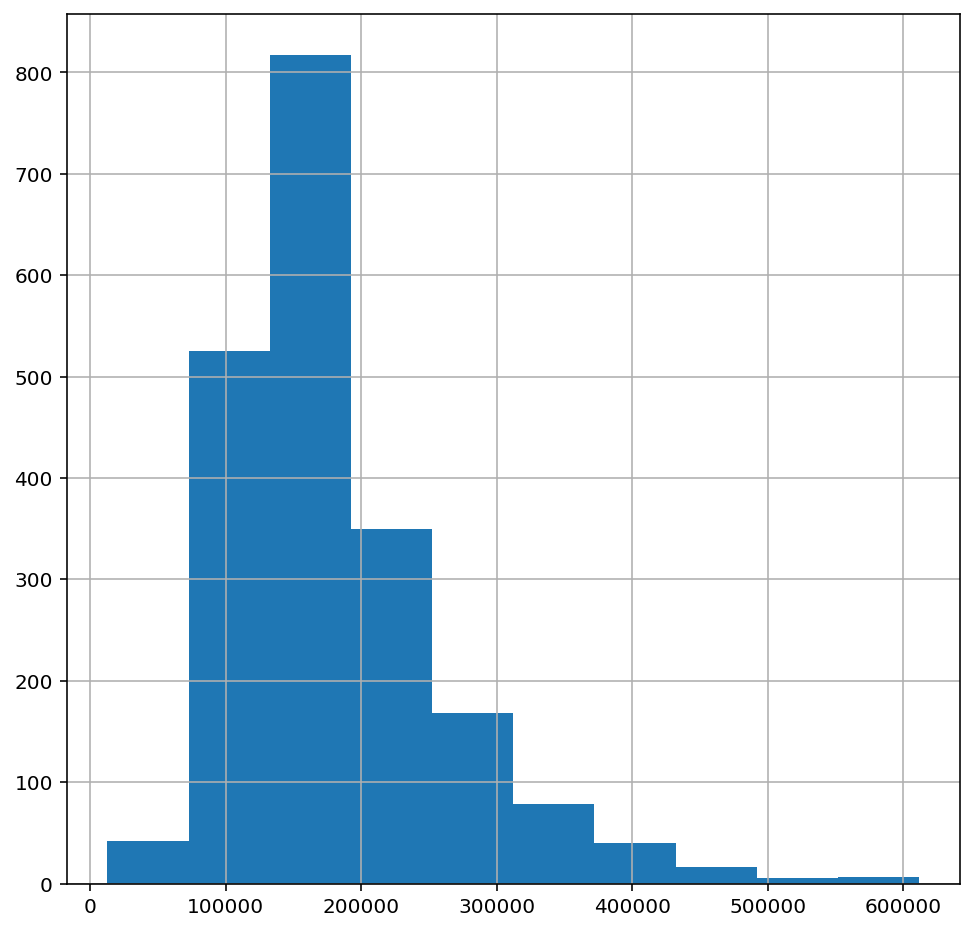

In [355]:
#histogram of sale price
df_train.saleprice.hist(figsize=(8,8));

### Histogram of sale price (target variable)
The sale price target variable has a positively skewed distribution, with a small number of expensive houses which stretches the distribution to the right. A logarithmic transformation can be considered to normalize the target variable in the prediction model.

In [356]:
# histogram subplots
def subplot_histograms(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/4)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=4,figsize=(15, nrows*3.5)) 
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        ax[i].hist(dataframe[column],bins=15)
        ax[i].set_title(f'{column} distribution',fontsize=14)
        ax[i].tick_params(labelsize=12)
        ax[i].set_xlabel(column, fontsize=14)
    plt.tight_layout()
    
# scatterplot subplots
def subplot_scatter(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/4)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=4,figsize=(15, nrows*3.5)) 
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        sns.regplot(y=dataframe.saleprice, x=dataframe[column],ax=ax[i], \
                    line_kws = {'color':'grey'})
        ax[i].set_title(f'{column} vs saleprice',fontsize=14)  
        ax[i].tick_params(labelsize=12)
        ax[i].set_xlabel(column, fontsize=14)
        ax[i].set_ylabel('saleprice', fontsize=14)
    plt.tight_layout()
    
# boxplot subplots
def subplot_box(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/4)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=4,figsize=(15, nrows*3.5)) 
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        sns.boxplot(y = dataframe[column], x = dataframe.saleprice, width = 0.3, ax = ax[i],orient='h')
        ax[i].set_title(column,fontsize=14)  
        ax[i].tick_params(labelsize=12)
        ax[i].set_xlabel('saleprice', fontsize=12)
        # ax[i].set_ylabel(column, fontsize=14)
    plt.tight_layout()

In [357]:
# list with only numerical columns
col_numerical = [col for col in df_train.columns if df_train[col].dtype != np.object]

# list with only categorical columns
col_categorical = [col for col in df_train.columns if col not in col_numerical]

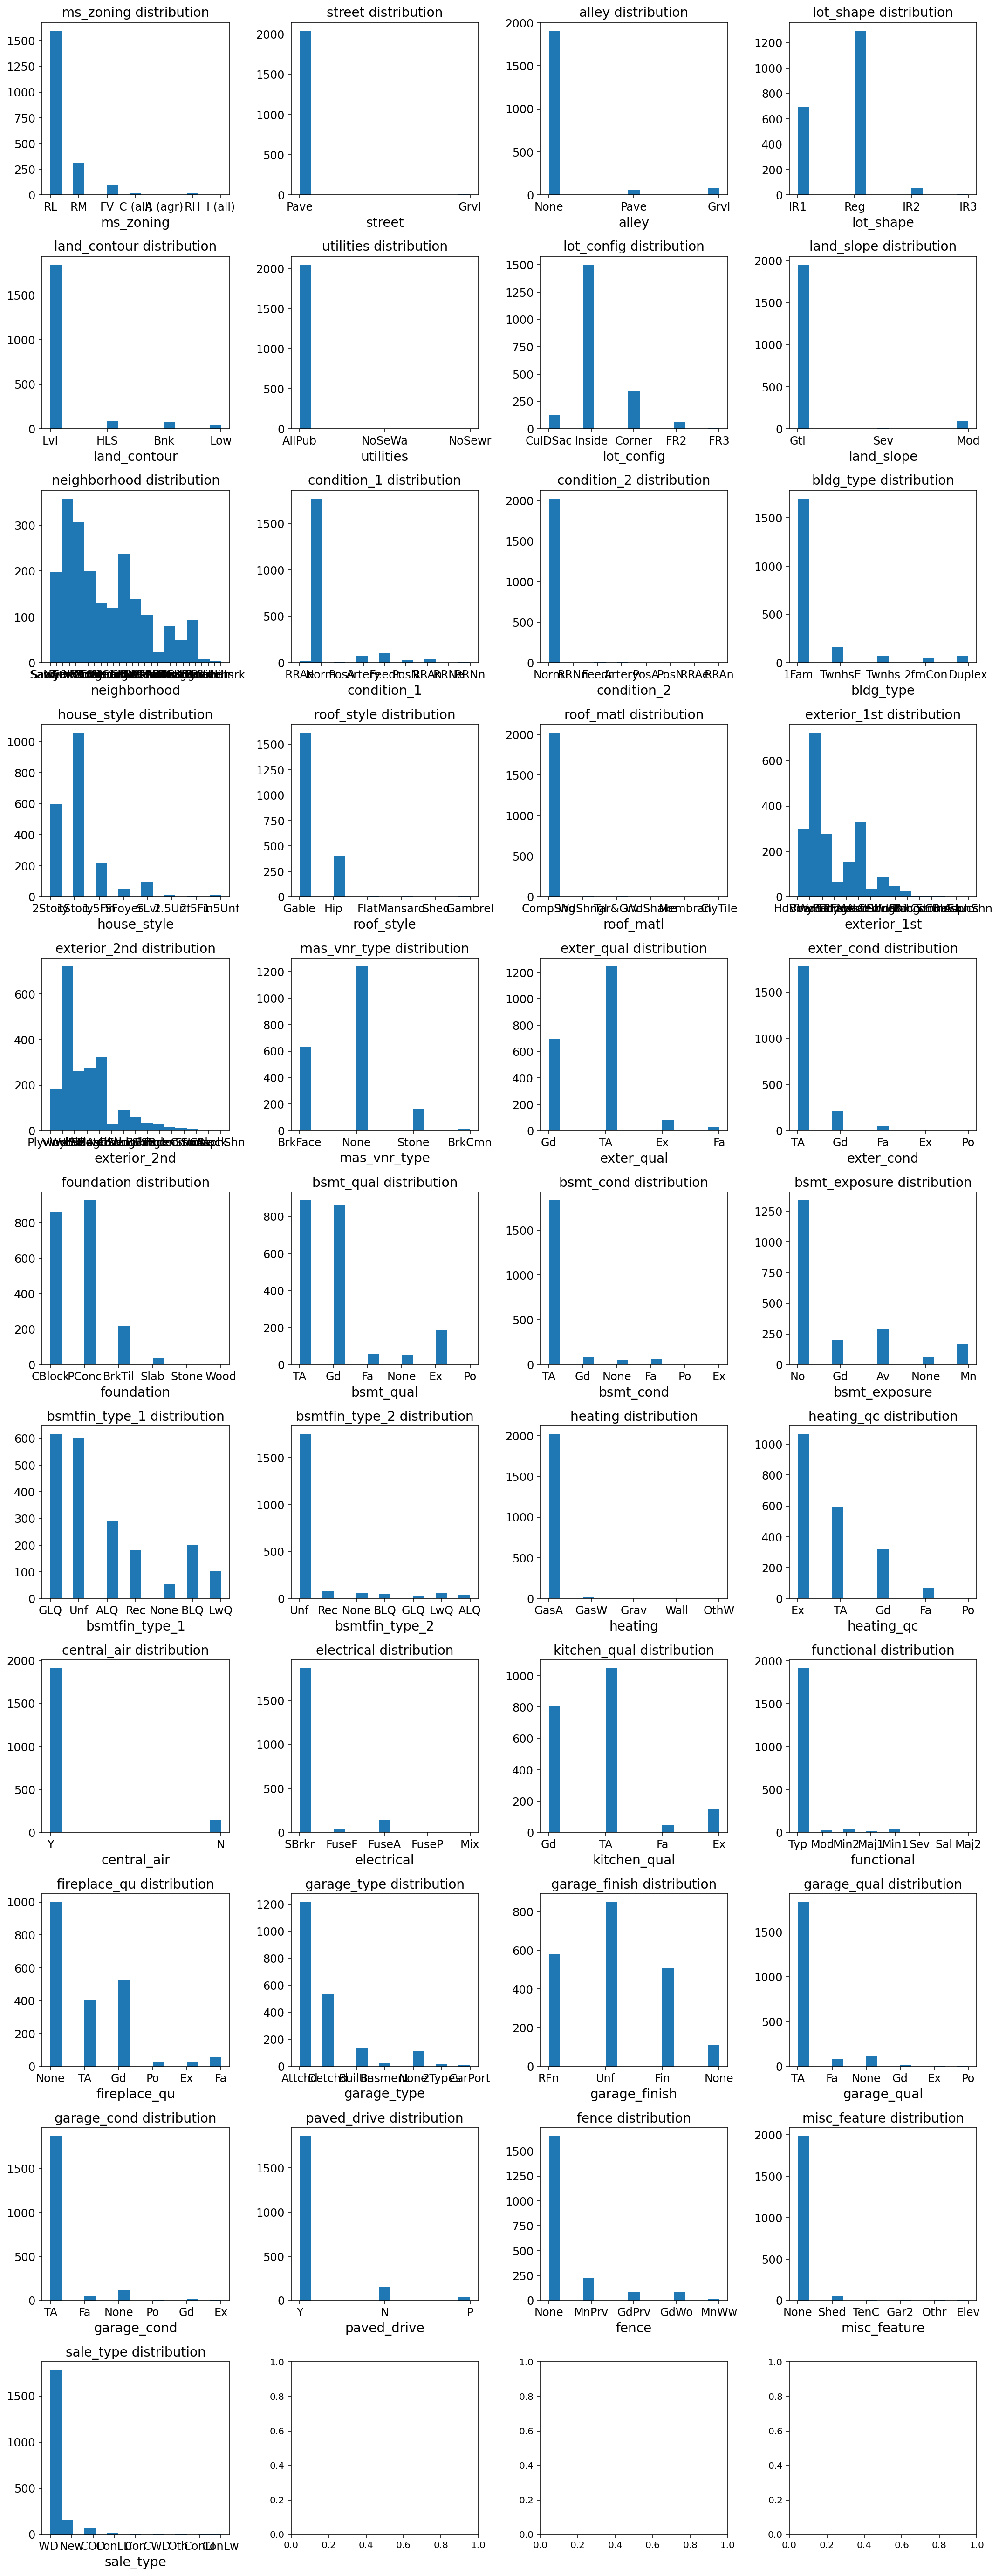

In [358]:
subplot_histograms(df_train,col_categorical)

### Histograms of categorical variables
Some of the categorical columns are dominated by a particular type (e.g. in alley, and land_contour), with very little representation of the other categories. Some columns can also be converted to numerical as they are ordinal (e.g. overall quality, basement condition).

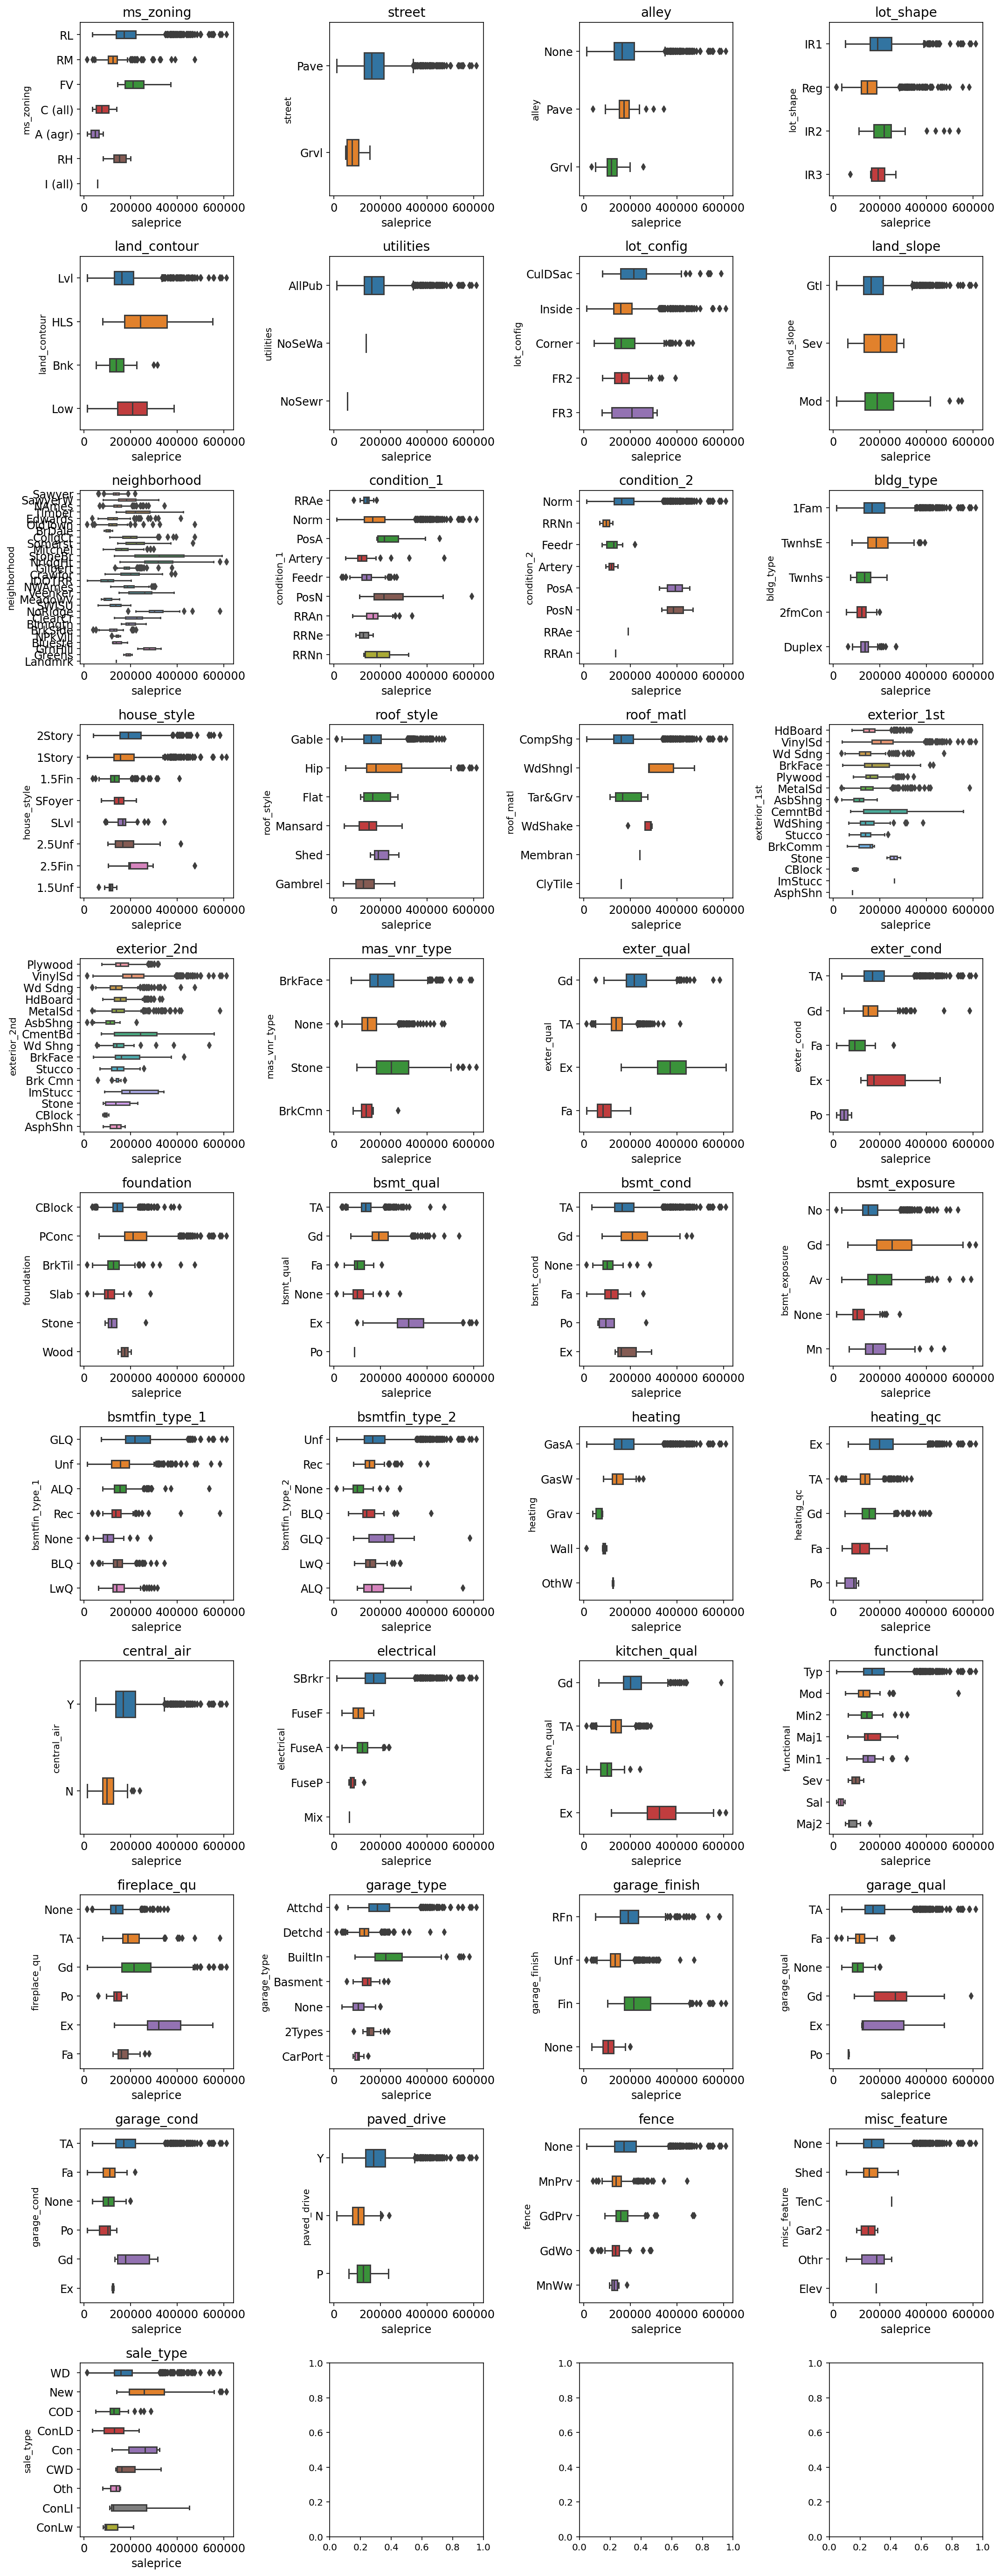

In [359]:
subplot_box(df_train, col_categorical)

### Box plots of categorical variables

There are some categorical variables which have an impact on saleprice, such as neighborhood, proximity to various conditions and kitchen quality.

### Scatter Plots of Sale Price vs. Numerical Variables

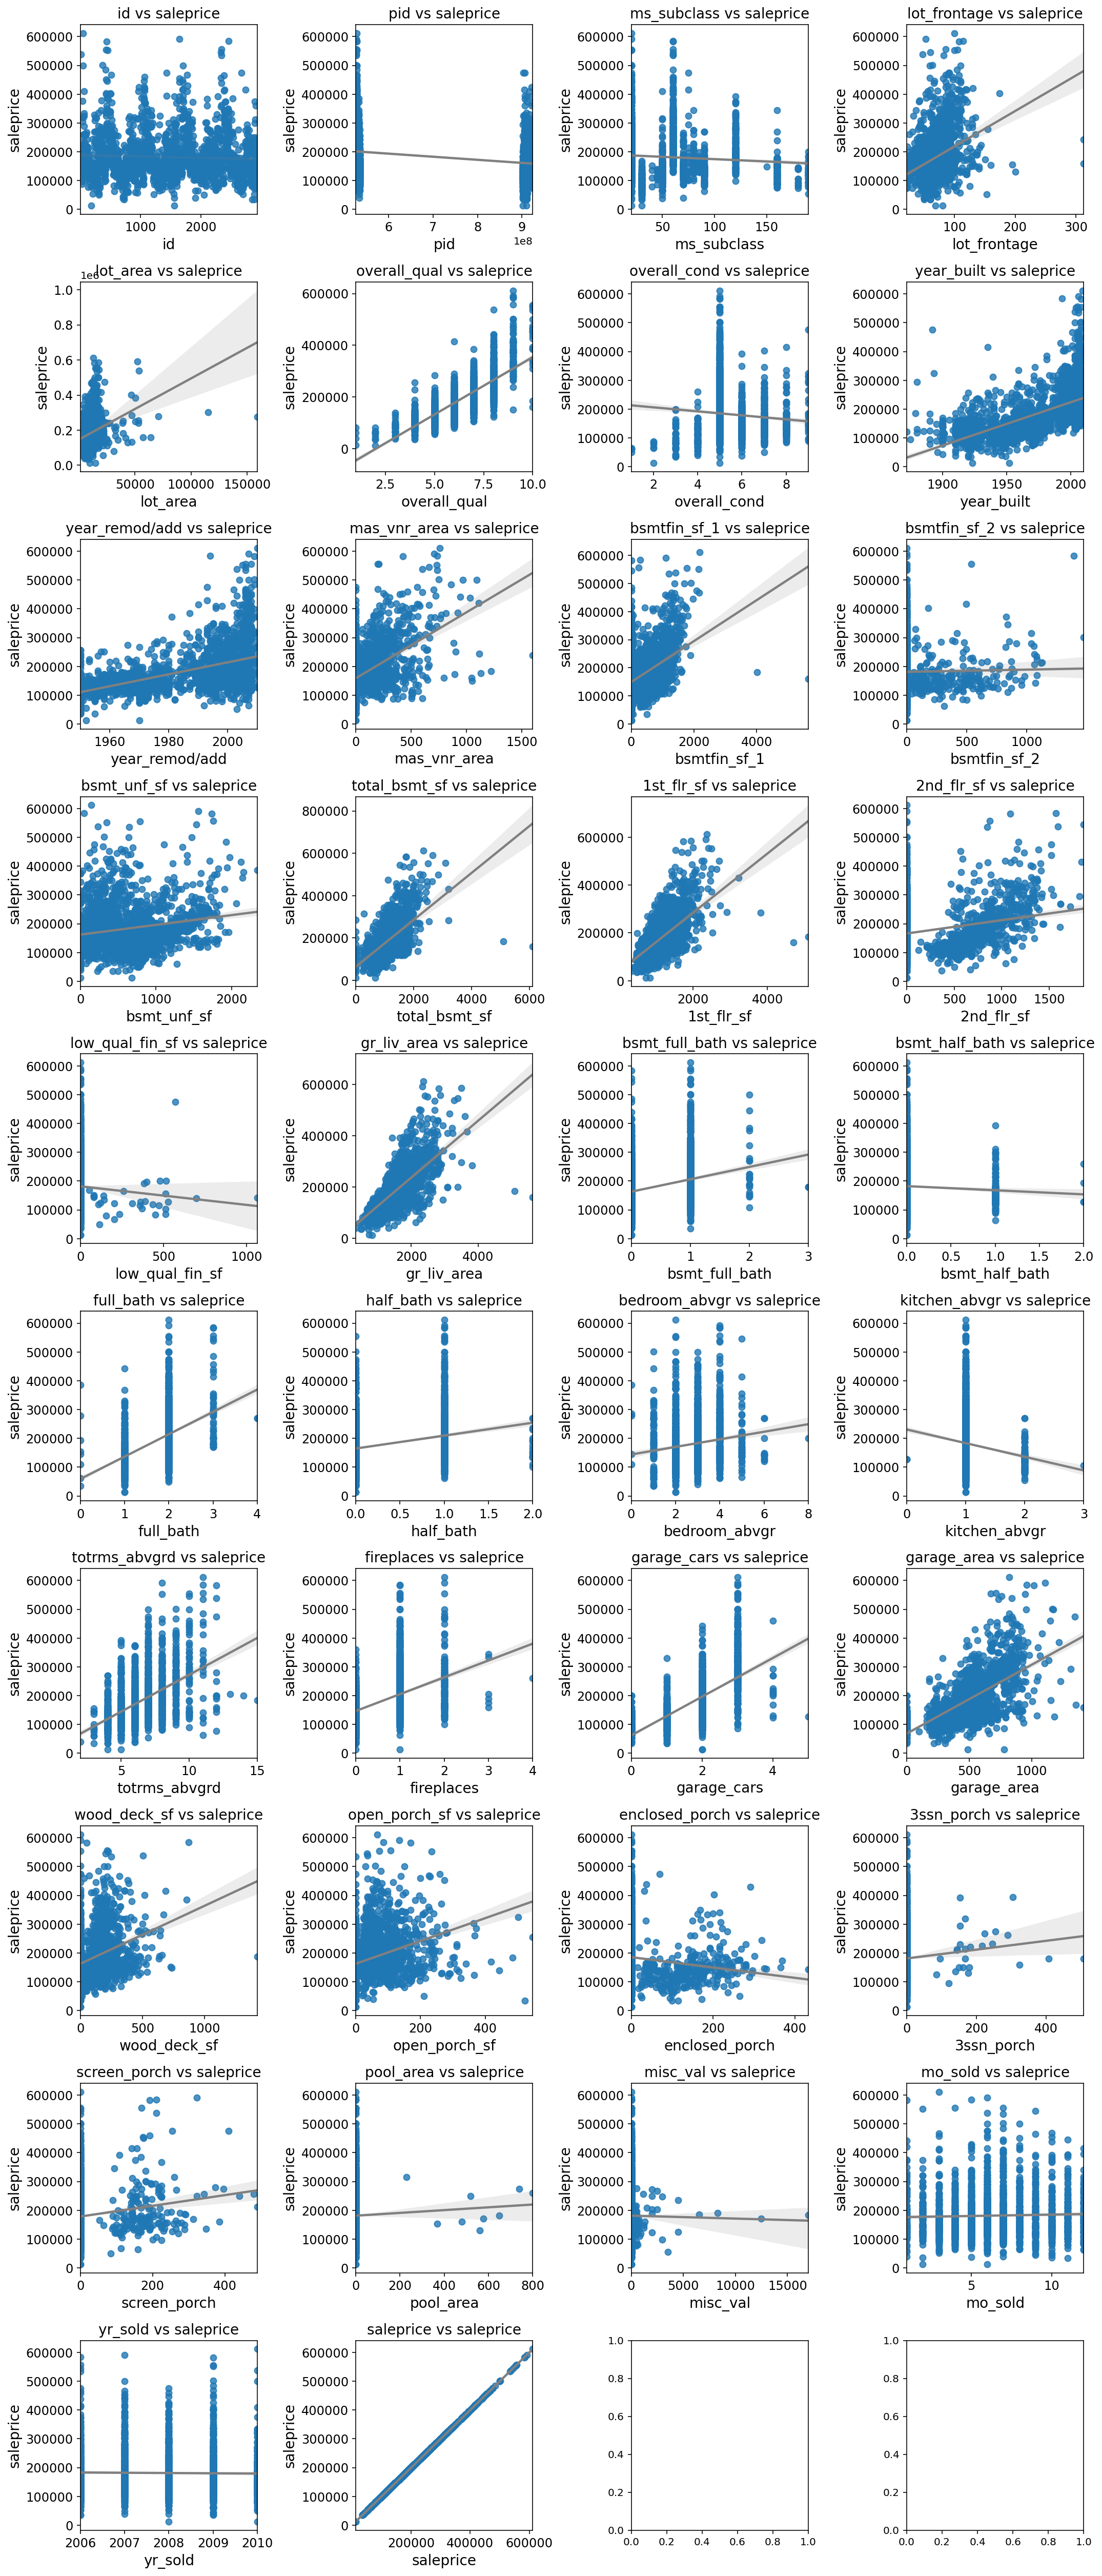

In [360]:
subplot_scatter(df_train,col_numerical)

### Relationship with saleprice, and outliers
From the above scatter plots, there are some variables with linear relationship to the sale price of the house for e.g. overall quality, year the house is built, total basement sqft, 1st floor sqft, ground living area, total rooms above ground and garage area, which is intuitive given that a house with large area and good finish is likely to fetch a higher price. 

There are also a few outliers in the lot area, basement finish sq ft and ground living area scatter plots. These are houses with large area but very low prices. These are likely true outliers which could be partial or unusual sales which don't represent market value hence they would be removed in subsequent cleaning steps.  

## Further cleaning

From the histograms and boxplots above, further cleaning steps were conducted on some categorical features, e.g. grouping of variables within feature for those with little representation or condensing to indicate presence or absence of particular categorical feature.  

#### Alley

In [361]:
# Convert existing Alley column into a dummy to indicate presence of Alley, and dummies for gravel alley and paved alley
df_train['alley_grvl'] = df_train['alley'].map(lambda x: 1 if x=='Grvl' else 0)
df_train['alley_pave'] = df_train['alley'].map(lambda x: 1 if x=='Pave' else 0)
df_train['alley'] = df_train['alley'].map(lambda x: 0 if x=='None' else 1)

#### Slope

In [362]:
df_train.land_slope.value_counts()

Gtl    1952
Mod      88
Sev      10
Name: land_slope, dtype: int64

In [363]:
# As there are relatively few houses with 'severe' slopes, this category will be grouped with 'moderate' in the land_slope column.
df_train['land_slope'] = df_train['land_slope'].map(lambda x: 'flat' if x == 'Gtl' else 'sloped')

#### Misc feature

In [364]:
# As the only category within misc_feature column with signficant sample size is Shed, it will be converted into a shed-presence column.
df_train['shed_pres'] = df_train['misc_feature'].apply(lambda x: 1 if x == 'Shed' else 0)
df_train.drop(columns = ['misc_feature'], inplace=True)

#### Pool

In [365]:
# As there is only <10 houses with values in pool_area column, it will be converted into a pool-presence column.
df_train['pool_pres'] = df_train['pool_area'].apply(lambda x: 1 if x >0 else 0)
df_train.drop(columns = ['pool_area'], inplace=True)

#### Age

In [366]:
# Create new column to indicate age of the house based on year built and year sold
for index, val in enumerate(df_train['year_built']):
    if val == df_train.loc[index, 'yr_sold']:
        df_train.loc[index, 'age_sold'] = 0
    else:
        df_train.loc[index, 'age_sold'] = df_train.loc[index,'yr_sold'] - val

# Check distribution of age sold
pd.DataFrame(df_train.age_sold.value_counts()).sort_index()

age_sold
-1.0           1
 0.0          80
 1.0         154
 2.0          62
 3.0          44
...          ...
 127.0         1
 128.0         2
 129.0         1
 135.0         1
 136.0         1

[123 rows x 1 columns]

In [367]:
df_train[df_train['age_sold']== -1]

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
1884  2181  908154195           20        RL         128.0     39290   Pave   

      alley lot_shape land_contour utilities lot_config land_slope  \
1884      0       IR1          Bnk    AllPub     Inside       flat   

     neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
1884      Edwards        Norm        Norm      1Fam      1Story            10   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
1884             5        2008            2009        Hip   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area exter_qual  \
1884      CemntBd      CmentBd        Stone        1224.0         Ex   

     exter_cond foundation bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  \
1884         TA      PConc        Ex        TA            Gd            GLQ   

      bsmtfin_sf_1 bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf  \
1884        4010.0            Unf           0.0       1085.0         5095.0   

     heating heating_qc central_air electrical  1st_flr_sf  2nd_flr_sf  \
1884    GasA         Ex           Y      SBrkr        5095           0   

      low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
1884                0         5095             1.0             1.0          2   

      half_bath  bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd  \
1884          1              2              1           Ex             15   

     functional  fireplaces fireplace_qu garage_type garage_finish  \
1884        Typ           2           Gd      Attchd           Fin   

      garage_cars  garage_area garage_qual garage_cond paved_drive  \
1884          3.0       1154.0          TA          TA           Y   

      wood_deck_sf  open_porch_sf  enclosed_porch  3ssn_porch  screen_porch  \
1884           546            484               0           0             0   

     fence  misc_val  mo_sold  yr_sold sale_type  saleprice  alley_grvl  \
1884  None     17000       10     2007       New     183850           0   

      alley_pave  shed_pres  pool_pres  age_sold  
1884           0          0          0      -1.0

In [368]:
# Remove row with erroneous age_sold value
df_train.drop(index=df_train[df_train['age_sold']== -1].index, inplace=True)
df_train = df_train.reset_index()
del df_train['index']

#### Re-modelling

In [369]:
# Create new column to indicate whether or not remodelling had been done on the house
for index, val in enumerate(df_train['year_remod/add']):
    if val == df_train.loc[index,'year_built']:
        df_train.loc[index,'remodelled'] = 0
    else:
        df_train.loc[index,'remodelled'] = 1

df_train.drop(columns = ['year_remod/add','year_built','yr_sold'], inplace=True)

#### Proximity to various conditions

In [370]:
df_train.groupby('condition_1')['saleprice'].describe()

count           mean            std       min       25%  \
condition_1                                                             
Artery         70.0  128765.000000   58285.726961   50000.0  103150.0   
Feedr         109.0  143223.605505   45259.511847   35000.0  119600.0   
Norm         1765.0  185027.284986   79634.227184   12789.0  131000.0   
PosA           12.0  254733.333333   91755.092337  185000.0  188425.0   
PosN           27.0  254794.296296  117428.552257  109500.0  172000.0   
RRAe           21.0  139685.714286   21115.617105   87000.0  129000.0   
RRAn           36.0  172604.777778   55498.209382   79500.0  140150.0   
RRNe            3.0  129616.666667   37705.315717   93850.0  109925.0   
RRNn            6.0  198208.333333   76223.096347  128000.0  134687.5   

                  50%       75%       max  
condition_1                                
Artery       118950.0  140750.0  475000.0  
Feedr        140000.0  160000.0  269500.0  
Norm         167000.0  218000.0  611657.0  
PosA         216000.0  276425.0  455000.0  
PosN         214500.0  295500.0  591587.0  
RRAe         142500.0  150000.0  184000.0  
RRAn         167250.0  187460.0  336820.0  
RRNe         126000.0  147500.0  169000.0  
RRNn         184000.0  237250.0  320000.0

In [371]:
# Group categories with similar effect on saleprice
proximity = {'Artery': 'Artery','Feedr': 'Feedr','Norm': 'Norm', 'PosA': 'Pos','PosN': 'Pos','RRAe': 'RRe','RRNe': 'RRe',
             'RRAn': 'RRn','RRNn': 'RRn'}

df_train['condition'] = df_train['condition_1'].map(proximity)

df_train.drop(columns = ['condition_1','condition_2'], inplace=True)  

#### Living Area

In [372]:
df_train[['1st_flr_sf','2nd_flr_sf','gr_liv_area']].head()

1st_flr_sf  2nd_flr_sf  gr_liv_area
0         725         754         1479
1         913        1209         2122
2        1057           0         1057
3         744         700         1444
4         831         614         1445

In [373]:
# Sum 1st_flr and 2nd_flr area
df_train['flr_sf'] = df_train['1st_flr_sf'] + df_train['2nd_flr_sf']

# Check whether the sum of 1st_flr and 2nd_flr area are the same as gr_liv_area 
print(len(df_train[df_train['flr_sf']==df_train['gr_liv_area']][['flr_sf','gr_liv_area']]))

2016


In [374]:
# Drop 1st_flr_sf column
# Create new column to indicate presence of 2nd_flr 
# Create new 'big_house' column for those houses with gr_liv_area bigger than the sum of 1st and 2nd floors

df_train['2nd_flr_pres'] = df_train['2nd_flr_sf'].map(lambda x: 1 if x > 0 else 0)

# create big_house column
for index, val in enumerate(df_train['flr_sf']):
    if val == df_train.loc[index, 'gr_liv_area']:
        df_train.loc[index, 'big_house'] = 0
    else:
        df_train.loc[index, 'big_house'] = 1

df_train.drop(columns = ['flr_sf','1st_flr_sf','2nd_flr_sf'], inplace=True)        

#### Convert Ordinal variables to Numerical variables 

In [375]:
# Mapping of ordinal variables to numerical values

df_train['exter_qual'] = df_train['exter_qual'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})
df_train['exter_cond'] = df_train['exter_cond'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})
df_train['kitchen_qual'] = df_train['kitchen_qual'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})
df_train['heating_qc'] = df_train['heating_qc'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})    
df_train['electrical'] = df_train['electrical'].map({'SBrkr':0,'FuseA':1,'FuseF':2, 'FuseP':3, 'Mix':1.5})
df_train['functional'] = df_train['functional'].map({'Typ':0,'Min1':1,'Min2':2,'Mod':3,'Maj1':4,'Maj2':5,'Sev':6,'Sal':7})
df_train['garage_finish'] = df_train['garage_finish'].map({'Fin':3,'RFn':2,'Unf':1,'None':0})
df_train['garage_qual'] = df_train['garage_qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
df_train['garage_cond'] = df_train['garage_cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
df_train['paved_drive'] = df_train['paved_drive'].map({'N':0,'P':1,'Y':2})
df_train['bsmt_qual'] = df_train['bsmt_qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
df_train['bsmt_cond'] = df_train['bsmt_cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
df_train['bsmtfin_type_1'] = df_train['bsmtfin_type_1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'None':0})
df_train['bsmtfin_type_2'] = df_train['bsmtfin_type_2'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'None':0})
df_train['bsmt_exposure'] = df_train['bsmt_exposure'].map({'Gd':3,'Av':2,'Mn':1,'No':0,'None':0})
df_train['fireplace_qu'] = df_train['fireplace_qu'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
df_train['fence'] = df_train['fence'].map({'GdPrv':3,'GdWo':2,'MnPrv':1,'MnWw':1,'None':0})

#### Convert numerical variable to categorical variable 

In [376]:
# Convert dwelling type to categorical variable
df_train['ms_subclass'] = df_train['ms_subclass'].astype(str)

#### Remove outliers

In [377]:
# Remove unusual sales outlier; houses with very large areas selling at low prices
df_train.drop(df_train[df_train['gr_liv_area'] > 4000].index, inplace = True)
# reset index
df_train = df_train.reset_index()
del df_train['index']

In [378]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2048 entries, 0 to 2047
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2048 non-null   int64  
 1   pid              2048 non-null   int64  
 2   ms_subclass      2048 non-null   object 
 3   ms_zoning        2048 non-null   object 
 4   lot_frontage     2048 non-null   float64
 5   lot_area         2048 non-null   int64  
 6   street           2048 non-null   object 
 7   alley            2048 non-null   int64  
 8   lot_shape        2048 non-null   object 
 9   land_contour     2048 non-null   object 
 10  utilities        2048 non-null   object 
 11  lot_config       2048 non-null   object 
 12  land_slope       2048 non-null   object 
 13  neighborhood     2048 non-null   object 
 14  bldg_type        2048 non-null   object 
 15  house_style      2048 non-null   object 
 16  overall_qual     2048 non-null   int64  
 17  overall_cond  

### Correlation Heatmap (Numerical variables)

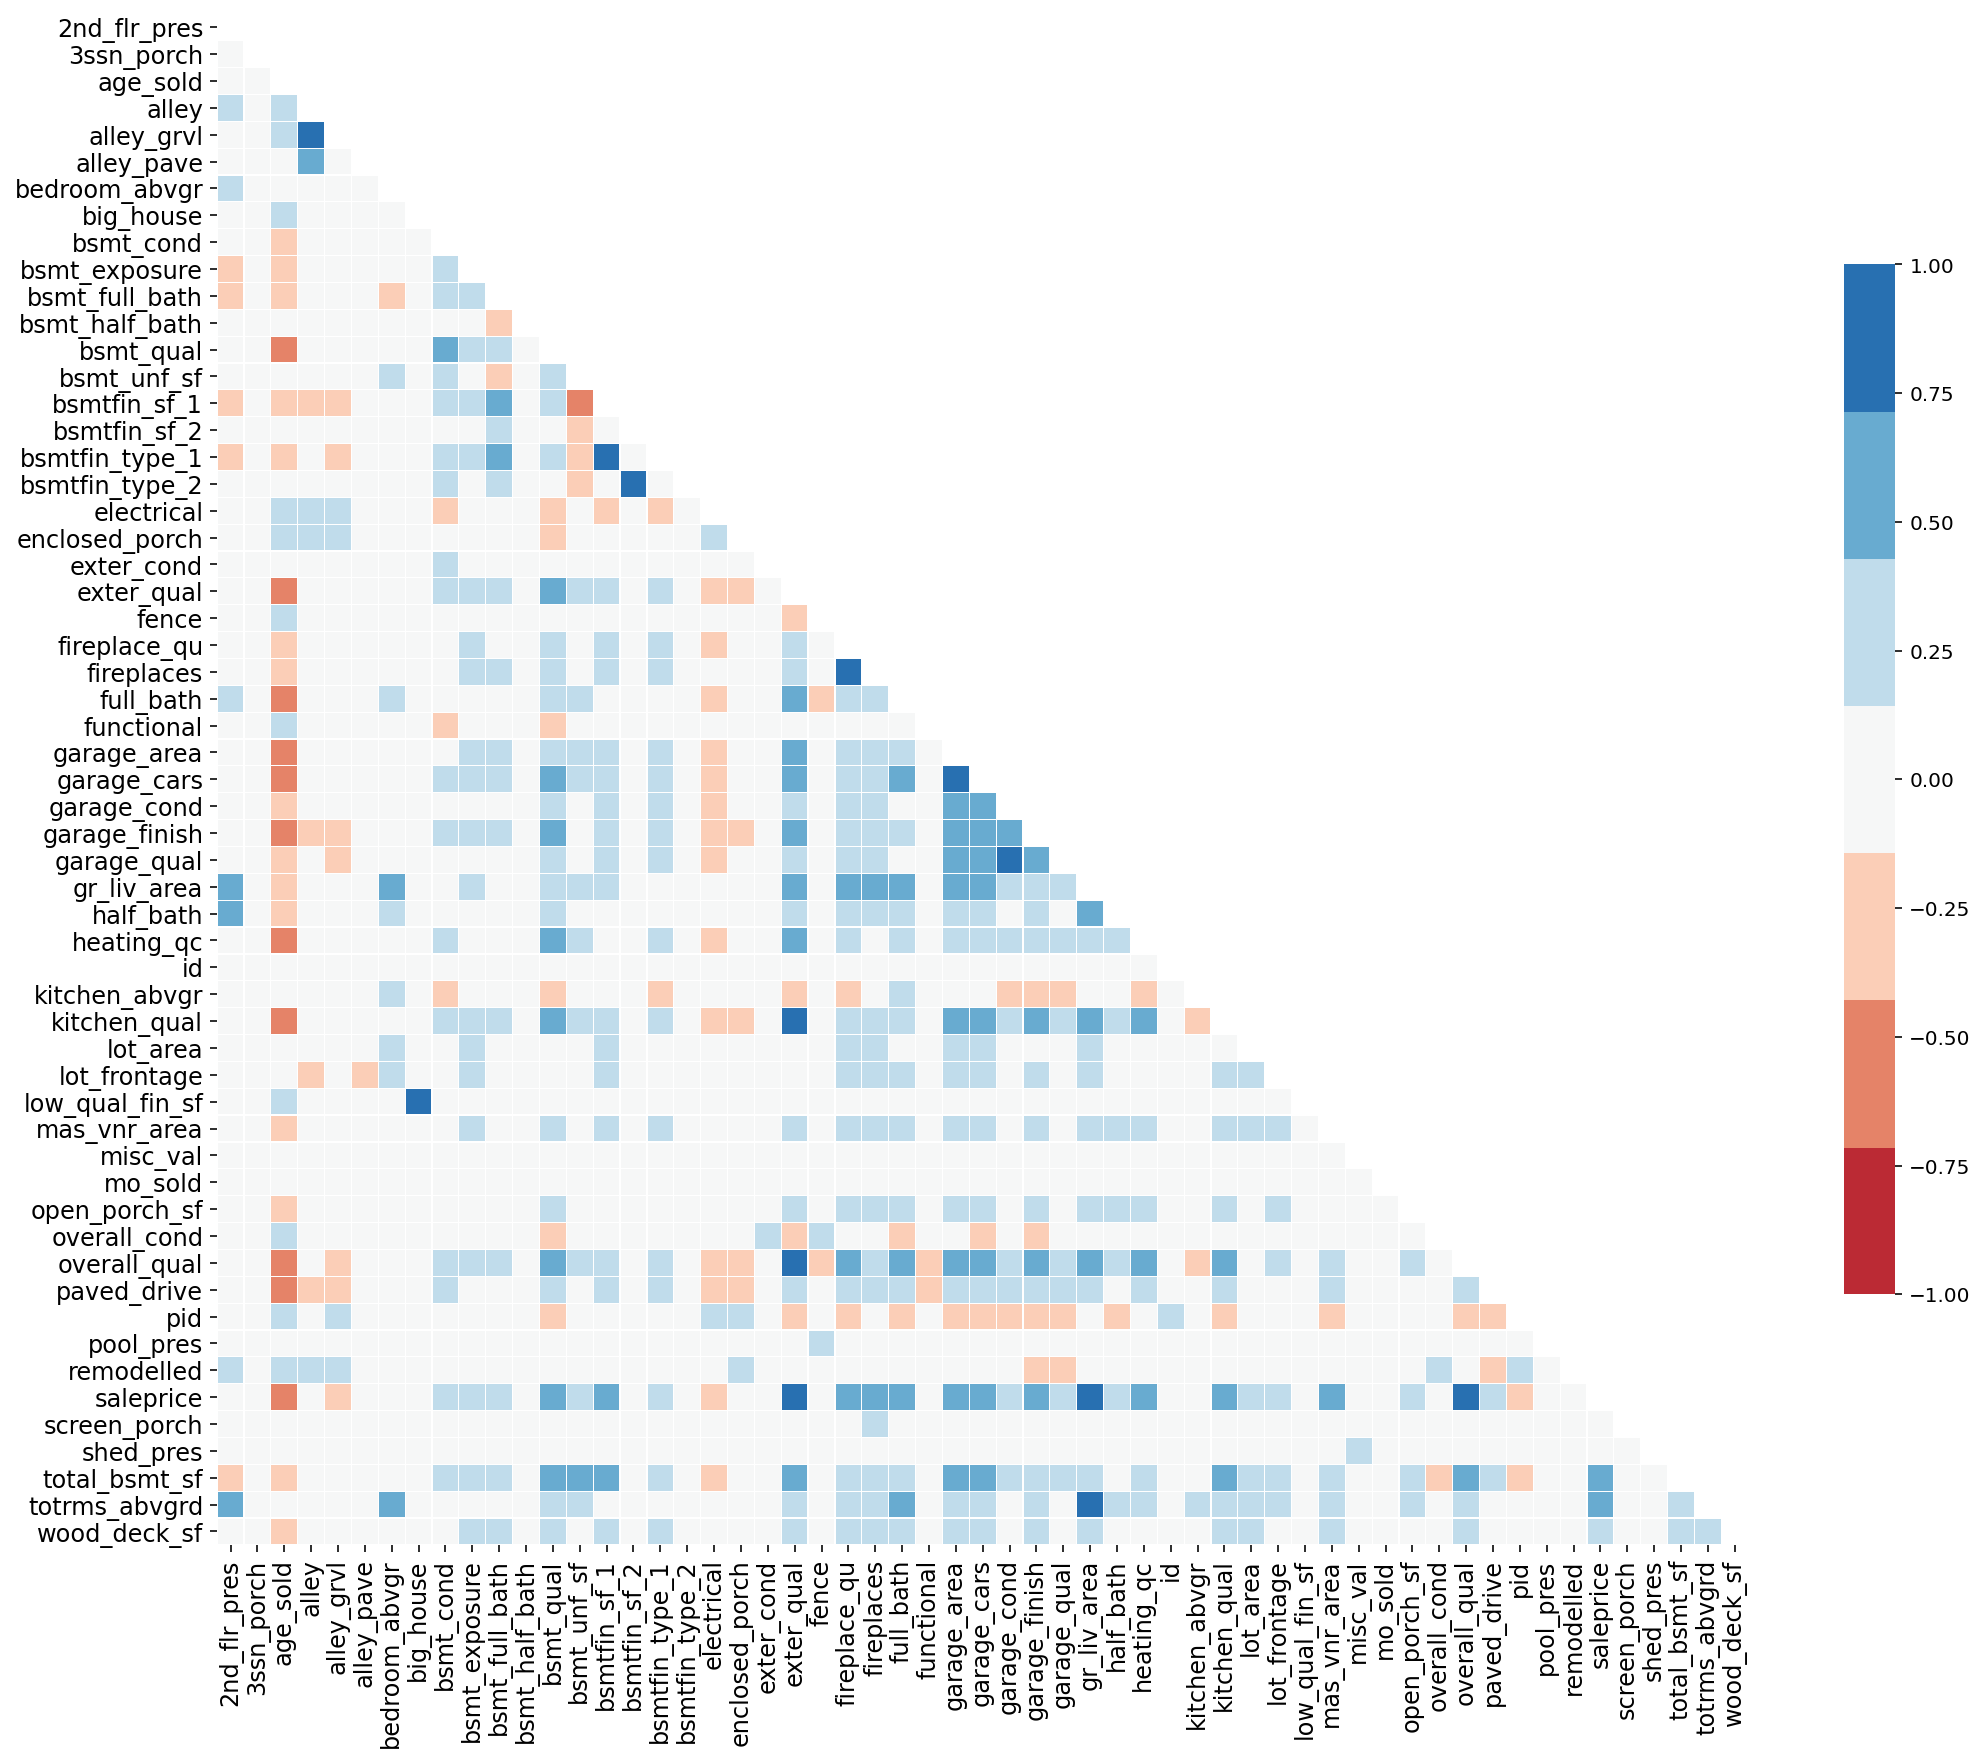

In [379]:
# order columns
df_train = df_train[df_train.columns.sort_values()]

# plot heatmap
mask = np.zeros_like(df_train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_train.corr(),
            mask = mask,
            square=True,
            vmin = -1,
            vmax = 1,
            linewidth=0.1,
            cbar_kws = {'shrink':0.5},
            cmap=sns.color_palette("RdBu", 7))
ax.tick_params(labelsize=12)
plt.tight_layout()

### Collinear features

From the heatmap above, there are some features that are highly correlated with each other. Examples include:

- size of garage in car capacity and sqft 
- alley presence and gravel alley
- basement finish types and sqft 
- number of fireplaces and fireplace quality 
- garage quality and garage condition
- total rooms above ground and gross living area

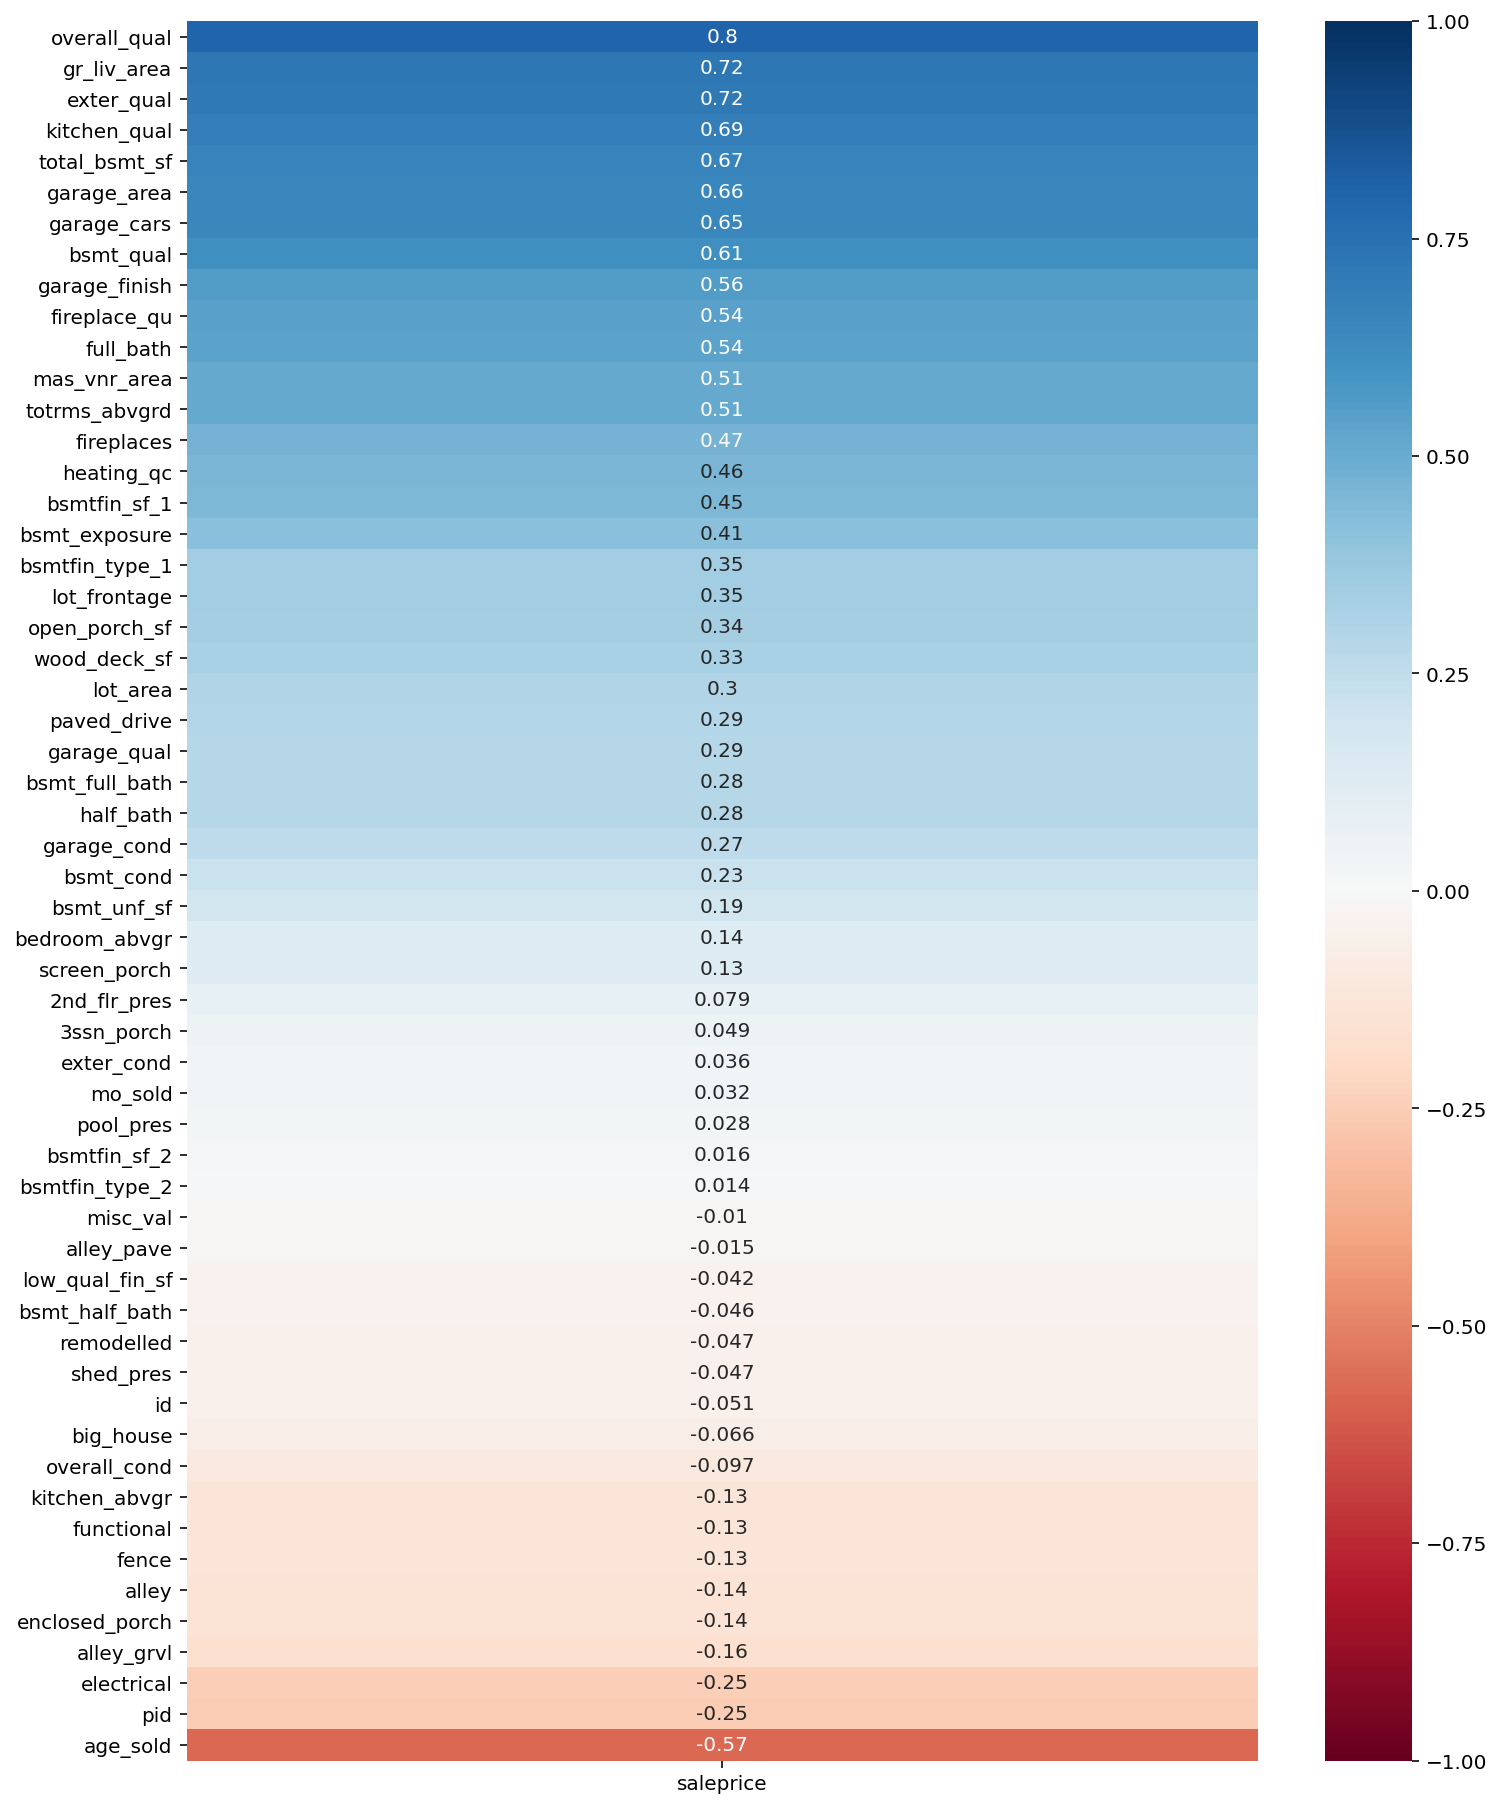

In [380]:
# plot heatmap of feature correlation wrt saleprice
figure = plt.figure(figsize=(12,16))
sns.heatmap(df_train.corr()[['saleprice']].sort_values('saleprice',ascending=False)[1:],annot=True, cmap='RdBu', center=0, vmin = -1,vmax = 1);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


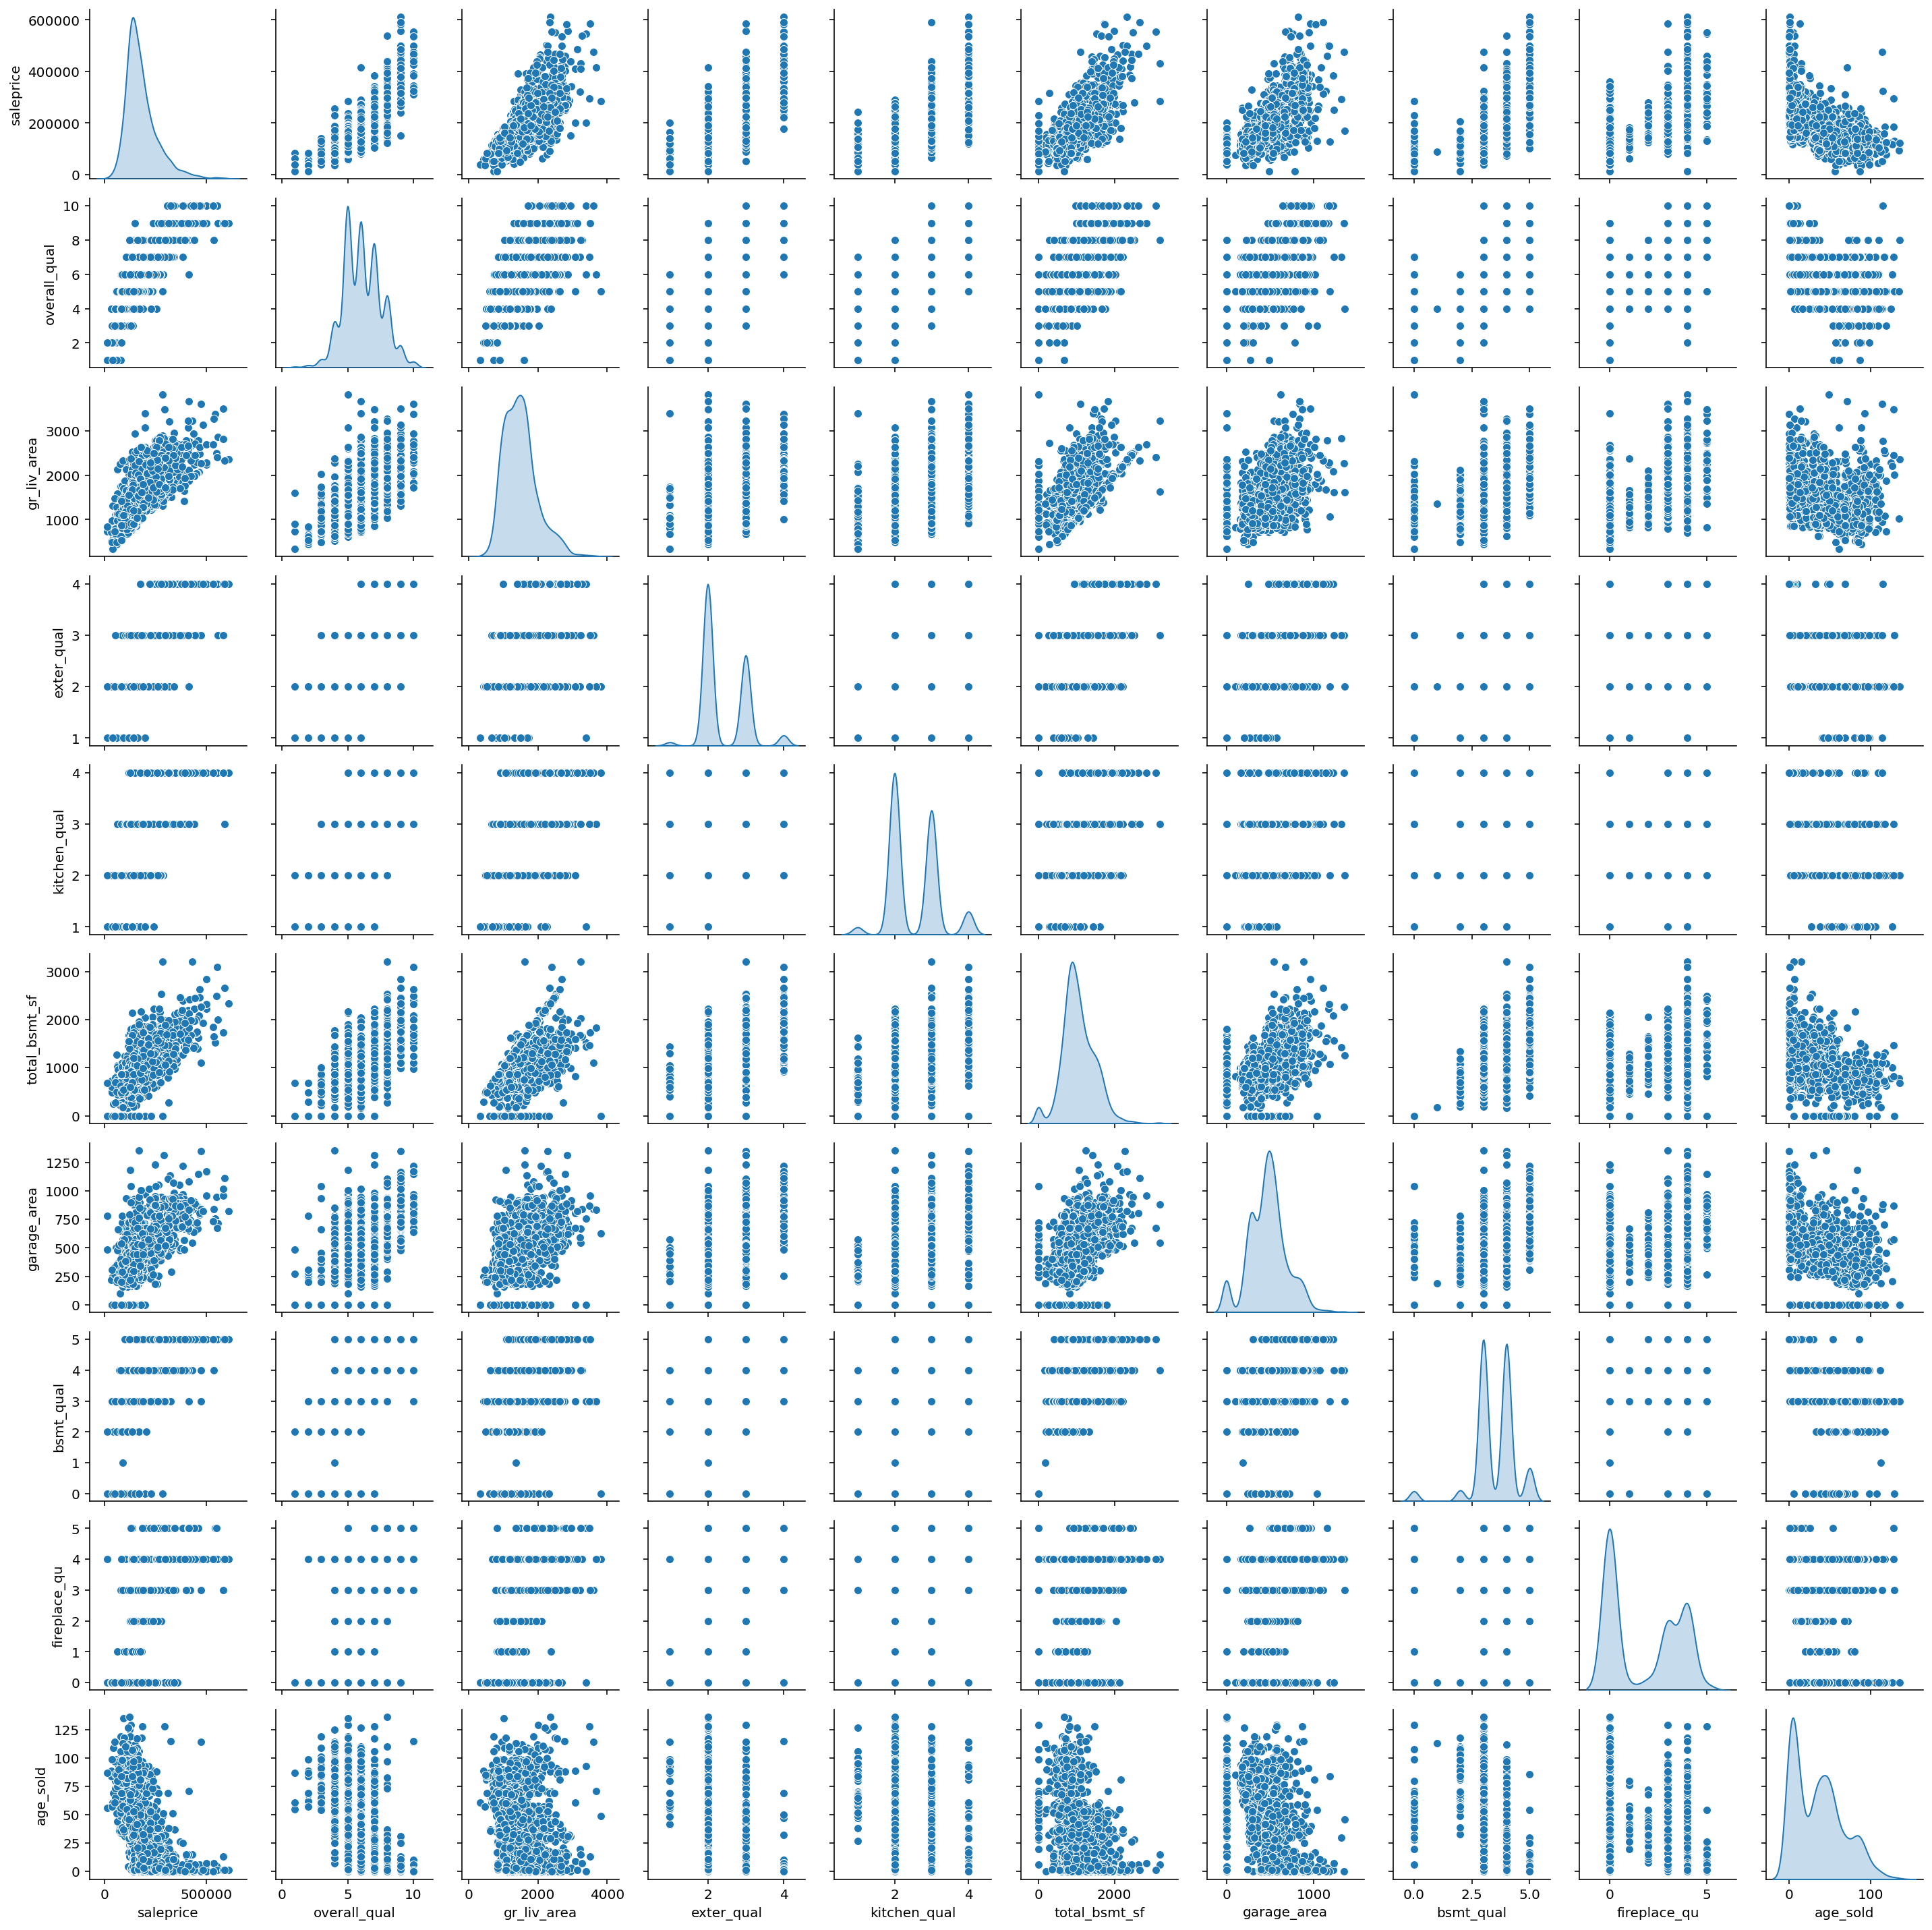

In [381]:
sns.pairplot(df_train,vars=['saleprice','overall_qual','gr_liv_area','exter_qual','kitchen_qual','total_bsmt_sf','garage_area','bsmt_qual','fireplace_qu','age_sold'], size = 2 ,kind ='scatter',diag_kind='kde')
plt.tight_layout()

### Potential strong predictors

From the heatmap above, the top numerical features that have positive correlation with sale price include overall quality, ground living area, exterior finish quality, kitchen quality, total basement area, garage capacity, garage finish, fireplace quality and number of full bathrooms above grade. On the contrary, house age has a strong negative correlation with sale price. 

From the scatter plots above, the overall quality variable seems to have a faintly upward curved plot vs. the sale price which points toward a possible polynomial relationship with sale price.

#### Drop columns with collinear features and no predictability

In [382]:
# Drop collinear columns
collinear_col = ['garage_cars','alley','bsmtfin_sf_1', 'bsmtfin_sf_2','garage_cond','totrms_abvgrd']    
df_train.drop(columns = collinear_col, inplace=True)   

# Drop columns with no predictability or heavily skewed (corr coeff < 0.05), including pid
no_pred_col = ['alley_pave','misc_val','bsmtfin_type_2','street','utilities','low_qual_fin_sf','3ssn_porch','exter_cond',\
               'mo_sold','low_qual_fin_sf','bsmt_half_bath','remodelled','shed_pres','pid','roof_matl']
df_train.drop(columns = no_pred_col, inplace=True)   

In [383]:
#Saves processed training data
df_train.to_csv('../datasets/train_cleaned.csv', index=False)

In [384]:
df_train

2nd_flr_pres  age_sold  alley_grvl  bedroom_abvgr  big_house bldg_type  \
0                1      34.0           0              3        0.0      1Fam   
1                1      13.0           0              4        0.0      1Fam   
2                0      57.0           0              3        0.0      1Fam   
3                1       4.0           0              3        0.0      1Fam   
4                1     110.0           0              3        0.0      1Fam   
...            ...       ...         ...            ...        ...       ...   
2043             0       1.0           0              3        0.0      1Fam   
2044             0      69.0           0              1        0.0      1Fam   
2045             1      81.0           0              3        0.0      1Fam   
2046             0      53.0           0              3        0.0      1Fam   
2047             1      11.0           0              3        0.0      1Fam   

      bsmt_cond  bsmt_exposure  bsmt_full_bath  bsmt_qual  bsmt_unf_sf  \
0             3              0             0.0          3        192.0   
1             3              0             1.0          4        276.0   
2             3              0             1.0          3        326.0   
3             3              0             0.0          4        384.0   
4             4              0             0.0          2        676.0   
...         ...            ...             ...        ...          ...   
2043          3              2             1.0          4        873.0   
2044          3              0             0.0          3        599.0   
2045          3              0             0.0          3        896.0   
2046          3              0             1.0          3        295.0   
2047          3              0             0.0          3        994.0   

      bsmtfin_type_1 central_air condition  electrical  enclosed_porch  \
0                  6           Y       RRe         0.0               0   
1                  6           Y      Norm         0.0               0   
2                  6           Y      Norm         0.0               0   
3                  1           Y      Norm         0.0               0   
4                  1           Y      Norm         0.0               0   
...              ...         ...       ...         ...             ...   
2043               6           Y      Norm         0.0               0   
2044               4           Y      Norm         0.0               0   
2045               1           Y      Norm         0.0               0   
2046               3           Y      Norm         0.0             140   
2047               1           Y      Norm         0.0               0   

      exter_qual exterior_1st exterior_2nd  fence  fireplace_qu  fireplaces  \
0              3      HdBoard      Plywood      0             0           0   
1              3      VinylSd      VinylSd      0             3           1   
2              2      VinylSd      VinylSd      0             0           0   
3              2      VinylSd      VinylSd      0             0           0   
4              2      Wd Sdng      Plywood      0             0           0   
...          ...          ...          ...    ...           ...         ...   
2043           3      VinylSd      VinylSd      0             4           1   
2044           2      VinylSd      VinylSd      0             0           0   
2045           2      BrkFace        Stone      0             3           1   
2046           2      Plywood      Plywood      0             4           2   
2047           2      VinylSd      VinylSd      0             3           1   

     foundation  full_bath  functional  garage_area  garage_finish  \
0        CBlock          2           0        475.0              2   
1         PConc          2           0        559.0              2   
2        CBlock          1           0        246.0              1   
3         PConc          2           0

In [385]:
#X_train[X_train['bldg_type_Duplex']==1]
df_train.groupby('bldg_type')['saleprice'].describe()

count           mean           std      min       25%       50%  \
bldg_type                                                                     
1Fam       1697.0  185311.671774  81978.251327  12789.0  130500.0  165250.0   
2fmCon       46.0  123179.891304  30304.813341  55000.0  101187.5  121200.0   
Duplex       75.0  139296.333333  40824.044796  62500.0  118250.0  136000.0   
Twnhs        69.0  133100.000000  37977.260030  73000.0  100000.0  134000.0   
TwnhsE      161.0  198312.372671  65866.184832  79400.0  147000.0  184000.0   

                75%       max  
bldg_type                      
1Fam       219500.0  611657.0  
2fmCon     139875.0  200000.0  
Duplex     148991.5  269500.0  
Twnhs      160000.0  230000.0  
TwnhsE     234250.0  392500.0

In [386]:
df_train.groupby('garage_type')['saleprice'].describe()

count           mean           std      min        25%  \
garage_type                                                            
2Types         19.0  157184.210526  33828.017040  87000.0  143050.00   
Attchd       1211.0  205094.886045  76990.676711  13100.0  150000.00   
Basment        27.0  143242.333333  39079.659751  55993.0  122875.00   
BuiltIn       132.0  247883.522727  99764.995090  91000.0  176954.25   
CarPort        11.0  103823.545455  19675.502999  82000.0   89375.00   
Detchd        535.0  132097.852336  40605.378316  12789.0  110000.00   
None          113.0  105669.150442  33704.765812  34900.0   82375.00   

                  50%       75%       max  
garage_type                                
2Types       150000.0  170500.0  235000.0  
Attchd       185900.0  238750.0  611657.0  
Basment      145000.0  159000.0  235000.0  
BuiltIn      221900.0  292809.0  582933.0  
CarPort      101800.0  108479.5  148000.0  
Detchd       129500.0  147200.0  475000.0  
None         104000.0  128000.0  200500.0

In [387]:
df_train[df_train['lot_area']>100000]

2nd_flr_pres  age_sold  alley_grvl  bedroom_abvgr  big_house bldg_type  \
471             1      49.0           0              4        0.0      1Fam   
694             0      36.0           0              2        0.0      1Fam   

     bsmt_cond  bsmt_exposure  bsmt_full_bath  bsmt_qual  bsmt_unf_sf  \
471          3              3             0.0          4        747.0   
694          3              3             1.0          4        424.0   

     bsmtfin_type_1 central_air condition  electrical  enclosed_porch  \
471               3           Y      Norm         0.0               0   
694               6           Y      Norm         0.0               0   

     exter_qual exterior_1st exterior_2nd  fence  fireplace_qu  fireplaces  \
471           3      Wd Sdng      HdBoard      0             3           2   
694           2      Plywood      Plywood      0             3           2   

    foundation  full_bath  functional  garage_area  garage_finish  \
471     CBlock          2           0        389.0              3   
694     CBlock          2           0        739.0              1   

     garage_qual garage_type  gr_liv_area  half_bath heating  heating_qc  \
471            3      Attchd         2144          0    GasA           3   
694            3      Attchd         1824          0    GasA           2   

    house_style    id  kitchen_abvgr  kitchen_qual land_contour land_slope  \
471      1.5Fin  2116              1             3          Low     sloped   
694      1Story  2072              1             3          Low     sloped   

     lot_area lot_config  lot_frontage lot_shape  mas_vnr_area mas_vnr_type  \
471    159000    CulDSac          92.5       IR2         472.0       BrkCmn   
694    115149    CulDSac          92.5       IR2         351.0        Stone   

    ms_subclass ms_zoning neighborhood  open_porch_sf  overall_cond  \
471          50        RL      ClearCr             98             7   
694          20        RL      ClearCr             48             5   

     overall_qual  paved_drive  pool_pres roof_style sale_type  saleprice  \
471             6            2          0      Gable       WD      277000   
694             7            2          0      Gable       WD      302000   

     screen_porch  total_bsmt_sf  wood_deck_sf  
471             0         1444.0             0  
694             0         1643.0           380

### Cleaning Test Data

In [388]:
# Import test data
df_test = pd.read_csv('../datasets/test.csv')

# Check size of test set
df_test.shape

(879, 80)

In [389]:
# Create function to apply data cleaning changes to test data

def changes_to_dataframe(data):
    
    # make column names lower case and remove spaces
    data.columns = data.columns.str.lower()
    data.columns = data.columns.str.replace(' ','_')
    
    # Impute null values
    data['mas_vnr_type'] = data['mas_vnr_type'].fillna('None')
    data['mas_vnr_area'] = data['mas_vnr_area'].fillna(0)
    
    for col in ['bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_type_2']:
        data[col] = data[col].fillna('None')
    for col in ['bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf','bsmt_full_bath','bsmt_half_bath']:
        data[col] = data[col].fillna(0.0)   
    
    for col in ['garage_type','garage_finish','garage_cond','garage_qual']:
        data[col] = data[col].fillna('None')

    for col in ['alley','fence','fireplace_qu','misc_feature']:
        data[col] = data[col].fillna('None')

    neighborhood_means = data.groupby('neighborhood')['lot_frontage'].mean()
    neighborhood_means = neighborhood_means.fillna(np.mean(neighborhood_means))
    data['lot_frontage'] = data['lot_frontage'].fillna(data['neighborhood'])
    data['lot_frontage'] = data['lot_frontage'].map(lambda x: neighborhood_means[x] if type(x)==str else x)

    data.drop(columns = ['pool_qc'], inplace=True)
    data.drop(columns = ['garage_yr_blt'], inplace=True)

    # Convert existing Alley column into a dummy to indicate presence of Alley, and dummies for gravel alley and paved alley
    data['alley_grvl'] = data['alley'].map(lambda x: 1 if x=='Grvl' else 0)
    data['alley_pave'] = data['alley'].map(lambda x: 1 if x=='Pave' else 0)
    data['alley'] = data['alley'].map(lambda x: 0 if x=='None' else 1)
    
    
    # relatively few houses with 'severe' slopes, this category will be grouped with 'moderate' in the land_slope column.
    data['land_slope'] = data['land_slope'].map(lambda x: 'flat' if x == 'Gtl' else 'sloped')

    # Convert into a shed-presence column.
    data['shed_pres'] = data['misc_feature'].apply(lambda x: 1 if x == 'Shed' else 0)
    data.drop(columns = ['misc_feature'], inplace=True)
    
    # Convert into a pool-presence column.
    data['pool_pres'] = data['pool_area'].apply(lambda x: 1 if x >0 else 0)
    data.drop(columns = ['pool_area'], inplace=True)
    
    # Create new column to indicate age of the house based on year built and year sold
    for index, val in enumerate(data['year_built']):
        if val == data.loc[index, 'yr_sold']:
            data.loc[index, 'age_sold'] = 0
        else:
            data.loc[index, 'age_sold'] = data.loc[index,'yr_sold'] - val
    
    
    # Create new column to indicate whether or not remodelling had been done on the house. 
    for index, val in enumerate(data['year_remod/add']):
        if val == data.loc[index,'year_built']:
            data.loc[index,'remodelled'] = 0
        else:
            data.loc[index,'remodelled'] = 1

    data.drop(columns = ['year_remod/add','year_built','yr_sold'], inplace=True)
    
    
    # Group proximity condition categories with similar effect on saleprice
    proximity = {'Artery': 'Artery','Feedr': 'Feedr','Norm': 'Norm', 'PosA': 'Pos','PosN': 'Pos','RRAe': 'RRe','RRNe': 'RRe',
             'RRAn': 'RRn','RRNn': 'RRn'}
    data['condition'] = data['condition_1'].map(proximity)

    data.drop(columns = ['condition_1','condition_2'], inplace=True)  
    
    # Sum 1st_flr and 2nd_flr area
    data['flr_sf'] = data['1st_flr_sf'] + data['2nd_flr_sf']
    
    # Drop 1st_flr_sf column
    # Create new column to indicate presence of 2nd_flr 
    # Create new 'big_house' column for those houses with gr_liv_area bigger than the sum of 1st and 2nd floors

    data['2nd_flr_pres'] = data['2nd_flr_sf'].map(lambda x: 1 if x > 0 else 0)

    # create big_house column
    for index, val in enumerate(data['flr_sf']):
        if val == data.loc[index, 'gr_liv_area']:
            data.loc[index, 'big_house'] = 0
        else:
            data.loc[index, 'big_house'] = 1

    data.drop(columns = ['flr_sf','1st_flr_sf','2nd_flr_sf'], inplace=True)  
    
    
    # Mapping of ordinal variables to numerical values

    data['exter_qual'] = data['exter_qual'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})
    data['exter_cond'] = data['exter_cond'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})
    data['kitchen_qual'] = data['kitchen_qual'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})
    data['heating_qc'] = data['heating_qc'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})    
    data['electrical'] = data['electrical'].map({'SBrkr':0,'FuseA':1,'FuseF':2, 'FuseP':3, 'Mix':1.5})
    data['functional'] = data['functional'].map({'Typ':0,'Min1':1,'Min2':2,'Mod':3,'Maj1':4,'Maj2':5,'Sev':6,'Sal':7})
    data['garage_finish'] = data['garage_finish'].map({'Fin':3,'RFn':2,'Unf':1,'None':0})
    data['garage_qual'] = data['garage_qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
    data['garage_cond'] = data['garage_cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
    data['paved_drive'] = data['paved_drive'].map({'N':0,'P':1,'Y':2})
    data['bsmt_qual'] = data['bsmt_qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
    data['bsmt_cond'] = data['bsmt_cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
    data['bsmtfin_type_1'] = data['bsmtfin_type_1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'None':0})
    data['bsmtfin_type_2'] = data['bsmtfin_type_2'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'None':0})
    data['bsmt_exposure'] = data['bsmt_exposure'].map({'Gd':3,'Av':2,'Mn':1,'No':0,'None':0})
    data['fireplace_qu'] = data['fireplace_qu'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
    data['fence'] = data['fence'].map({'GdPrv':3,'GdWo':2,'MnPrv':1,'MnWw':1,'None':0})
    
    
    # Convert dwelling type to categorical variable
    data['ms_subclass'] = data['ms_subclass'].astype(str)
    
    
    # Drop collinear columns
    collinear_col = ['garage_cars','alley','bsmtfin_sf_1', 'bsmtfin_sf_2','garage_cond','totrms_abvgrd']    
    data.drop(columns = collinear_col, inplace=True)   

    # Drop columns with no predictability or heavily skewed
    no_pred_col = ['alley_pave','misc_val','bsmtfin_type_2','street','utilities','low_qual_fin_sf','3ssn_porch','exter_cond',\
               'mo_sold','low_qual_fin_sf','bsmt_half_bath','remodelled','shed_pres','pid','roof_matl']
    data.drop(columns = no_pred_col, inplace=True)   
    
    data['electrical'] = data['electrical'].fillna(0)
    
    return data

In [390]:
changes_to_dataframe(df_test)

id ms_subclass ms_zoning  lot_frontage  lot_area lot_shape  \
0    2658         190        RM     69.000000      9142       Reg   
1    2718          90        RL     79.222222      9662       IR1   
2    2414          60        RL     58.000000     17104       IR1   
3    1989          30        RM     60.000000      8520       Reg   
4     625          20        RL     75.254545      9500       IR1   
..    ...         ...       ...           ...       ...       ...   
874  1662          60        RL     80.000000      8000       Reg   
875  1234          60        RL     90.000000     14670       Reg   
876  1373          20        RL     55.000000      8250       Reg   
877  1672          20        RL     60.000000      9000       Reg   
878  1939          20        RL     70.000000      8400       Reg   

    land_contour lot_config land_slope neighborhood bldg_type house_style  \
0            Lvl     Inside       flat      OldTown    2fmCon      2Story   
1            Lvl     Inside       flat       Sawyer    Duplex      1Story   
2            Lvl     Inside       flat      Gilbert      1Fam      2Story   
3            Lvl     Inside       flat      OldTown      1Fam      1Story   
4            Lvl     Inside       flat        NAmes      1Fam      1Story   
..           ...        ...        ...          ...       ...         ...   
874          Lvl     Inside       flat       NWAmes      1Fam      2Story   
875          Lvl     Inside       flat        NAmes      1Fam      2Story   
876          Lvl     Inside       flat       Sawyer      1Fam      1Story   
877          Lvl        FR2       flat        NAmes      1Fam      1Story   
878          Lvl     Corner       flat        NAmes      1Fam      1Story   

     overall_qual  overall_cond roof_style exterior_1st exterior_2nd  \
0               6             8      Gable      AsbShng      AsbShng   
1               5             4      Gable      Plywood      Plywood   
2               7             5      Gable      VinylSd      VinylSd   
3               5             6      Gable      Wd Sdng      Wd Sdng   
4               6             5      Gable      Plywood      Plywood   
..            ...           ...        ...          ...          ...   
874             6             6      Gable      HdBoard      HdBoard   
875             6             7      Gable      VinylSd      VinylSd   
876             5             5        Hip      HdBoard      HdBoard   
877             4             6      Gable      HdBoard      HdBoard   
878             5             5      Gable      MetalSd      MetalSd   

    mas_vnr_type  mas_vnr_area  exter_qual foundation  bsmt_qual  bsmt_cond  \
0           None           0.0           2      Stone          2          3   
1           None           0.0           2     CBlock          4          3   
2           None           0.0           3      PConc          4          4   
3           None           0.0           3     CBlock          3          3   
4        BrkFace         247.0           2     CBlock          4          3   
..           ...           ...         ...        ...        ...        ...   
874         None           0.0           2     CBlock          3          3   
875      BrkFace         410.0           3     CBlock          3          3   
876         None           0.0           2     CBlock          3          3   
877         None           0.0           2      PConc          3          3   
878         None           0.0           2     CBlock          3          3   

     bsmt_exposure  bsmtfin_type_1  bsmt_unf_sf  total_bsmt_sf heating  \
0                0               1         1020           1020    GasA   
1                0               1         1967           1967    GasA   
2                2               6          100            654    GasA   
3                0               1          968            968    GasA   
4                0               4          785           1394    Gas

In [391]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 58 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              879 non-null    int64  
 1   ms_subclass     879 non-null    object 
 2   ms_zoning       879 non-null    object 
 3   lot_frontage    879 non-null    float64
 4   lot_area        879 non-null    int64  
 5   lot_shape       879 non-null    object 
 6   land_contour    879 non-null    object 
 7   lot_config      879 non-null    object 
 8   land_slope      879 non-null    object 
 9   neighborhood    879 non-null    object 
 10  bldg_type       879 non-null    object 
 11  house_style     879 non-null    object 
 12  overall_qual    879 non-null    int64  
 13  overall_cond    879 non-null    int64  
 14  roof_style      879 non-null    object 
 15  exterior_1st    879 non-null    object 
 16  exterior_2nd    879 non-null    object 
 17  mas_vnr_type    879 non-null    obj

In [392]:
# Save processed test data
df_test.to_csv('../datasets/test_cleaned.csv', index=False)

## Pre-processing & Feature Engineering

### Feature Engineering - polynomial features

Feature engineering using polynomial features was examined to identify features that could have a non-linear relationship with sale price, and features that could interact with each other and affect sale price of the house. 

In [393]:
# Generate numerical features
num_cols = [col for col in df_train._get_numeric_data().columns if col != 'saleprice']
y = df_train['saleprice']
X_num = df_train[num_cols]

In [394]:
# Generate the full polynomial feature table  
poly = PolynomialFeatures(include_bias=False)
X_poly = poly.fit_transform(X_num)
X_poly.shape

(2048, 819)

In [395]:
# Add appropriate feature names to all polynomial features
X_poly = pd.DataFrame(X_poly,columns=poly.get_feature_names(X_num.columns))

# Generate list of poly feature correlations
X_poly_corrs = X_poly.corrwith(y)
# Show features most highly correlated (positively) with sale price, poly features included
X_poly_corrs.sort_values(ascending=False).head(20)

gr_liv_area overall_qual      0.872989
exter_qual gr_liv_area        0.865445
gr_liv_area kitchen_qual      0.850697
bsmt_qual gr_liv_area         0.842692
kitchen_qual overall_qual     0.830709
overall_qual^2                0.830584
overall_qual total_bsmt_sf    0.828394
exter_qual overall_qual       0.826861
garage_area overall_qual      0.825326
gr_liv_area total_bsmt_sf     0.820103
bsmt_qual overall_qual        0.815971
kitchen_qual total_bsmt_sf    0.812367
garage_area gr_liv_area       0.808406
exter_qual total_bsmt_sf      0.807928
garage_area kitchen_qual      0.805243
overall_qual                  0.803464
exter_qual garage_area        0.800131
bsmt_qual total_bsmt_sf       0.791652
bsmt_qual garage_area         0.784071
garage_area total_bsmt_sf     0.783304
dtype: float64

In [396]:
# Show features most highly correlated (negatively) with sale price, poly features included
X_poly_corrs.sort_values().head(5)

age_sold                 -0.572515
age_sold kitchen_abvgr   -0.539061
age_sold bsmt_cond       -0.502745
age_sold exter_qual      -0.501360
age_sold bsmt_qual       -0.490509
dtype: float64

In [397]:
# Add interaction between Overall Quality and Above Ground Living Area
X_num['overall_qual_gr_liv_area'] = X_num['overall_qual'] * X_num['gr_liv_area']
# Add Square of Overall Quality
X_num['overall_qual^2'] = X_num['overall_qual'] * X_num['overall_qual']

<ipython-input-397-cece5da3f6ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_num['overall_qual_gr_liv_area'] = X_num['overall_qual'] * X_num['gr_liv_area']
<ipython-input-397-cece5da3f6ed>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_num['overall_qual^2'] = X_num['overall_qual'] * X_num['overall_qual']


In [398]:
X_num

2nd_flr_pres  age_sold  alley_grvl  bedroom_abvgr  big_house  bsmt_cond  \
0                1      34.0           0              3        0.0          3   
1                1      13.0           0              4        0.0          3   
2                0      57.0           0              3        0.0          3   
3                1       4.0           0              3        0.0          3   
4                1     110.0           0              3        0.0          4   
...            ...       ...         ...            ...        ...        ...   
2043             0       1.0           0              3        0.0          3   
2044             0      69.0           0              1        0.0          3   
2045             1      81.0           0              3        0.0          3   
2046             0      53.0           0              3        0.0          3   
2047             1      11.0           0              3        0.0          3   

      bsmt_exposure  bsmt_full_bath  bsmt_qual  bsmt_unf_sf  bsmtfin_type_1  \
0                 0             0.0          3        192.0               6   
1                 0             1.0          4        276.0               6   
2                 0             1.0          3        326.0               6   
3                 0             0.0          4        384.0               1   
4                 0             0.0          2        676.0               1   
...             ...             ...        ...          ...             ...   
2043              2             1.0          4        873.0               6   
2044              0             0.0          3        599.0               4   
2045              0             0.0          3        896.0               1   
2046              0             1.0          3        295.0               3   
2047              0             0.0          3        994.0               1   

      electrical  enclosed_porch  exter_qual  fence  fireplace_qu  fireplaces  \
0            0.0               0           3      0             0           0   
1            0.0               0           3      0             3           1   
2            0.0               0           2      0             0           0   
3            0.0               0           2      0             0           0   
4            0.0               0           2      0             0           0   
...          ...             ...         ...    ...           ...         ...   
2043         0.0               0           3      0             4           1   
2044         0.0               0           2      0             0           0   
2045         0.0               0           2      0             3           1   
2046         0.0             140           2      0             4           2   
2047         0.0               0           2      0             3           1   

      full_bath  functional  garage_area  garage_finish  garage_qual  \
0             2           0        475.0              2            3   
1             2           0        559.0              2            3   
2             1           0        246.0              1            3   
3             2           0        400.0              3            3   
4             2           0        484.0              1            3   
...         ...         ...          ...            ...          ...   
2043          2           0        520.0              3            3   
2044          1           0        539.0              1            3   
2045          1           0        342.0              1            2   
2046          1           0        294.0              1            3   
2047          2           0        442.0              3            3   

      gr_liv_area  half_bath  heating_qc    id  kitchen_abvgr  kitchen_qual  \
0            1479          1           4   109              1             3   
1            2122          1           4   544              1             3   
2        

Two additional polynomial features are added based on the top correlation score (interaction between overall quality and gross living area of the house) and earlier scatter plots where the overall quality feature shows slight polynomial relationship with sale price shown by the larger proportionate increase in sale price as the quality score increases at the higher end of spectrum.   

In [399]:
X_cat = df_train.loc[:,df_train.dtypes==np.object]

In [400]:
X = pd.concat([X_num, X_cat], axis=1)

In [401]:
X

2nd_flr_pres  age_sold  alley_grvl  bedroom_abvgr  big_house  bsmt_cond  \
0                1      34.0           0              3        0.0          3   
1                1      13.0           0              4        0.0          3   
2                0      57.0           0              3        0.0          3   
3                1       4.0           0              3        0.0          3   
4                1     110.0           0              3        0.0          4   
...            ...       ...         ...            ...        ...        ...   
2043             0       1.0           0              3        0.0          3   
2044             0      69.0           0              1        0.0          3   
2045             1      81.0           0              3        0.0          3   
2046             0      53.0           0              3        0.0          3   
2047             1      11.0           0              3        0.0          3   

      bsmt_exposure  bsmt_full_bath  bsmt_qual  bsmt_unf_sf  bsmtfin_type_1  \
0                 0             0.0          3        192.0               6   
1                 0             1.0          4        276.0               6   
2                 0             1.0          3        326.0               6   
3                 0             0.0          4        384.0               1   
4                 0             0.0          2        676.0               1   
...             ...             ...        ...          ...             ...   
2043              2             1.0          4        873.0               6   
2044              0             0.0          3        599.0               4   
2045              0             0.0          3        896.0               1   
2046              0             1.0          3        295.0               3   
2047              0             0.0          3        994.0               1   

      electrical  enclosed_porch  exter_qual  fence  fireplace_qu  fireplaces  \
0            0.0               0           3      0             0           0   
1            0.0               0           3      0             3           1   
2            0.0               0           2      0             0           0   
3            0.0               0           2      0             0           0   
4            0.0               0           2      0             0           0   
...          ...             ...         ...    ...           ...         ...   
2043         0.0               0           3      0             4           1   
2044         0.0               0           2      0             0           0   
2045         0.0               0           2      0             3           1   
2046         0.0             140           2      0             4           2   
2047         0.0               0           2      0             3           1   

      full_bath  functional  garage_area  garage_finish  garage_qual  \
0             2           0        475.0              2            3   
1             2           0        559.0              2            3   
2             1           0        246.0              1            3   
3             2           0        400.0              3            3   
4             2           0        484.0              1            3   
...         ...         ...          ...            ...          ...   
2043          2           0        520.0              3            3   
2044          1           0        539.0              1            3   
2045          1           0        342.0              1            2   
2046          1           0        294.0              1            3   
2047          2           0        442.0              3            3   

      gr_liv_area  half_bath  heating_qc    id  kitchen_abvgr  kitchen_qual  \
0            1479          1           4   109              1             3   
1            2122          1           4   544              1             3   
2        

### Scale data

In [402]:
num_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.number))]

In [403]:
num_cols

Index(['2nd_flr_pres', 'age_sold', 'alley_grvl', 'bedroom_abvgr', 'big_house',
       'bsmt_cond', 'bsmt_exposure', 'bsmt_full_bath', 'bsmt_qual',
       'bsmt_unf_sf', 'bsmtfin_type_1', 'electrical', 'enclosed_porch',
       'exter_qual', 'fence', 'fireplace_qu', 'fireplaces', 'full_bath',
       'functional', 'garage_area', 'garage_finish', 'garage_qual',
       'gr_liv_area', 'half_bath', 'heating_qc', 'id', 'kitchen_abvgr',
       'kitchen_qual', 'lot_area', 'lot_frontage', 'mas_vnr_area',
       'open_porch_sf', 'overall_cond', 'overall_qual', 'paved_drive',
       'pool_pres', 'screen_porch', 'total_bsmt_sf', 'wood_deck_sf',
       'overall_qual_gr_liv_area', 'overall_qual^2'],
      dtype='object')

In [404]:
# Remove columns which indicate presence-absence of certain features. Already encoded 0 and 1. 
num_cols = ['id', 'lot_frontage', 'lot_area', 'overall_qual', 'overall_cond','mas_vnr_area', 'exter_qual', \
            'bsmt_qual', 'bsmt_cond', 'bsmt_exposure','bsmtfin_type_1', 'bsmt_unf_sf', 'total_bsmt_sf', 'heating_qc', \
            'electrical', 'gr_liv_area', 'bsmt_full_bath', 'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', \
            'kitchen_qual', 'functional','fireplaces', 'fireplace_qu', 'garage_finish', 'garage_area','garage_qual', \
            'paved_drive', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', 'screen_porch', 'fence', 'age_sold',\
            'overall_qual_gr_liv_area','overall_qual^2']

In [405]:
num_cols

['id',
 'lot_frontage',
 'lot_area',
 'overall_qual',
 'overall_cond',
 'mas_vnr_area',
 'exter_qual',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 'heating_qc',
 'electrical',
 'gr_liv_area',
 'bsmt_full_bath',
 'full_bath',
 'half_bath',
 'bedroom_abvgr',
 'kitchen_abvgr',
 'kitchen_qual',
 'functional',
 'fireplaces',
 'fireplace_qu',
 'garage_finish',
 'garage_area',
 'garage_qual',
 'paved_drive',
 'wood_deck_sf',
 'open_porch_sf',
 'enclosed_porch',
 'screen_porch',
 'fence',
 'age_sold',
 'overall_qual_gr_liv_area',
 'overall_qual^2']

In [406]:
# Standardize data
ss = StandardScaler()
X[num_cols] = ss.fit_transform(X[num_cols])

In [407]:
# Check standardization
X

2nd_flr_pres  age_sold  alley_grvl  bedroom_abvgr  big_house  bsmt_cond  \
0                1 -0.068877           0       0.188982        0.0   0.123717   
1                1 -0.764573           0       1.398469        0.0   0.123717   
2                0  0.693075           0       0.188982        0.0   0.123717   
3                1 -1.062728           0       0.188982        0.0   0.123717   
4                1  2.448878           0       0.188982        0.0   1.871107   
...            ...       ...         ...            ...        ...        ...   
2043             0 -1.162113           0       0.188982        0.0   0.123717   
2044             0  1.090615           0      -2.229990        0.0   0.123717   
2045             1  1.488156           0       0.188982        0.0   0.123717   
2046             0  0.560562           0       0.188982        0.0   0.123717   
2047             1 -0.830830           0       0.188982        0.0   0.123717   

      bsmt_exposure  bsmt_full_bath  bsmt_qual  bsmt_unf_sf  bsmtfin_type_1  \
0         -0.625916       -0.817473  -0.542071    -0.843438        1.147503   
1         -0.625916        1.100265   0.568091    -0.654696        1.147503   
2         -0.625916        1.100265  -0.542071    -0.542350        1.147503   
3         -0.625916       -0.817473   0.568091    -0.412028       -1.205407   
4         -0.625916       -0.817473  -1.652233     0.244076       -1.205407   
...             ...             ...        ...          ...             ...   
2043       1.284480        1.100265   0.568091     0.686722        1.147503   
2044      -0.625916       -0.817473  -0.542071     0.071062        0.206339   
2045      -0.625916       -0.817473  -0.542071     0.738401       -1.205407   
2046      -0.625916        1.100265  -0.542071    -0.612005       -0.264243   
2047      -0.625916       -0.817473  -0.542071     0.958600       -1.205407   

      electrical  enclosed_porch  exter_qual     fence  fireplace_qu  \
0      -0.287714       -0.376760    1.015611 -0.429759     -0.975652   
1      -0.287714       -0.376760    1.015611 -0.429759      0.685308   
2      -0.287714       -0.376760   -0.690682 -0.429759     -0.975652   
3      -0.287714       -0.376760   -0.690682 -0.429759     -0.975652   
4      -0.287714       -0.376760   -0.690682 -0.429759     -0.975652   
...          ...             ...         ...       ...           ...   
2043   -0.287714       -0.376760    1.015611 -0.429759      1.238962   
2044   -0.287714       -0.376760   -0.690682 -0.429759     -0.975652   
2045   -0.287714       -0.376760   -0.690682 -0.429759      0.685308   
2046   -0.287714        1.967371   -0.690682 -0.429759      1.238962   
2047   -0.287714       -0.376760   -0.690682 -0.429759      0.685308   

      fireplaces  full_bath  functional  garage_area  garage_finish  \
0      -0.927085   0.770677   -0.229959     0.009893       0.308944   
1       0.645964   0.770677   -0.229959     0.401594       0.308944   
2      -0.927085  -1.049792   -0.229959    -1.057959      -0.804995   
3      -0.927085   0.770677   -0.229959    -0.339840       1.422883   
4      -0.927085   0.770677   -0.229959     0.051861      -0.804995   
...          ...        ...         ...          ...            ...   
2043    0.645964   0.770677   -0.229959     0.219733       1.422883   
2044   -0.927085  -1.049792   -0.229959     0.308332      -0.804995   
2045    0.645964  -1.049792   -0.229959    -0.610300      -0.804995   
2046    2.219012  -1.049792   -0.229959    -0.834130      -0.804995   
2047    0.645964   0.770677   -0.229959    -0.143989       1.422883   

      garage_qual  gr_liv_area  half_bath  heating_qc        id  \
0        0.272356    -0.033745   1.256692    0.874206 -1.616321   
1        0.272356     1.290041   1.256692    0.874206 -1.100967   
2        0.272356    -0.902544  -0.739976   -1.200387 -1.564194   
3        0.272356    -0.105802   1.256692   -0.163091 -1.368714   
4        0.272356    -0.103743 

### One_hot encoding

In [408]:
# one-hot encode categorical columns
X_ss = pd.get_dummies(X, drop_first = False)

In [409]:
X_ss.shape

(2048, 195)

In [410]:
X_ss

2nd_flr_pres  age_sold  alley_grvl  bedroom_abvgr  big_house  bsmt_cond  \
0                1 -0.068877           0       0.188982        0.0   0.123717   
1                1 -0.764573           0       1.398469        0.0   0.123717   
2                0  0.693075           0       0.188982        0.0   0.123717   
3                1 -1.062728           0       0.188982        0.0   0.123717   
4                1  2.448878           0       0.188982        0.0   1.871107   
...            ...       ...         ...            ...        ...        ...   
2043             0 -1.162113           0       0.188982        0.0   0.123717   
2044             0  1.090615           0      -2.229990        0.0   0.123717   
2045             1  1.488156           0       0.188982        0.0   0.123717   
2046             0  0.560562           0       0.188982        0.0   0.123717   
2047             1 -0.830830           0       0.188982        0.0   0.123717   

      bsmt_exposure  bsmt_full_bath  bsmt_qual  bsmt_unf_sf  bsmtfin_type_1  \
0         -0.625916       -0.817473  -0.542071    -0.843438        1.147503   
1         -0.625916        1.100265   0.568091    -0.654696        1.147503   
2         -0.625916        1.100265  -0.542071    -0.542350        1.147503   
3         -0.625916       -0.817473   0.568091    -0.412028       -1.205407   
4         -0.625916       -0.817473  -1.652233     0.244076       -1.205407   
...             ...             ...        ...          ...             ...   
2043       1.284480        1.100265   0.568091     0.686722        1.147503   
2044      -0.625916       -0.817473  -0.542071     0.071062        0.206339   
2045      -0.625916       -0.817473  -0.542071     0.738401       -1.205407   
2046      -0.625916        1.100265  -0.542071    -0.612005       -0.264243   
2047      -0.625916       -0.817473  -0.542071     0.958600       -1.205407   

      electrical  enclosed_porch  exter_qual     fence  fireplace_qu  \
0      -0.287714       -0.376760    1.015611 -0.429759     -0.975652   
1      -0.287714       -0.376760    1.015611 -0.429759      0.685308   
2      -0.287714       -0.376760   -0.690682 -0.429759     -0.975652   
3      -0.287714       -0.376760   -0.690682 -0.429759     -0.975652   
4      -0.287714       -0.376760   -0.690682 -0.429759     -0.975652   
...          ...             ...         ...       ...           ...   
2043   -0.287714       -0.376760    1.015611 -0.429759      1.238962   
2044   -0.287714       -0.376760   -0.690682 -0.429759     -0.975652   
2045   -0.287714       -0.376760   -0.690682 -0.429759      0.685308   
2046   -0.287714        1.967371   -0.690682 -0.429759      1.238962   
2047   -0.287714       -0.376760   -0.690682 -0.429759      0.685308   

      fireplaces  full_bath  functional  garage_area  garage_finish  \
0      -0.927085   0.770677   -0.229959     0.009893       0.308944   
1       0.645964   0.770677   -0.229959     0.401594       0.308944   
2      -0.927085  -1.049792   -0.229959    -1.057959      -0.804995   
3      -0.927085   0.770677   -0.229959    -0.339840       1.422883   
4      -0.927085   0.770677   -0.229959     0.051861      -0.804995   
...          ...        ...         ...          ...            ...   
2043    0.645964   0.770677   -0.229959     0.219733       1.422883   
2044   -0.927085  -1.049792   -0.229959     0.308332      -0.804995   
2045    0.645964  -1.049792   -0.229959    -0.610300      -0.804995   
2046    2.219012  -1.049792   -0.229959    -0.834130      -0.804995   
2047    0.645964   0.770677   -0.229959    -0.143989       1.422883   

      garage_qual  gr_liv_area  half_bath  heating_qc        id  \
0        0.272356    -0.033745   1.256692    0.874206 -1.616321   
1        0.272356     1.290041   1.256692    0.874206 -1.100967   
2        0.272356    -0.902544  -0.739976   -1.200387 -1.564194   
3        0.272356    -0.105802   1.256692   -0.163091 -1.368714   
4        0.272356    -0.103743 

### Train-test split training data

In [411]:
# train-test split
X_train_ss, X_test_ss, y_train, y_test = train_test_split(X_ss, y, test_size = 0.2, random_state = 42)

## Modelling

### Cross validation

#### Linear Regression

In [413]:
# Use dummy regressor to predict using mean
dr = DummyRegressor()
# Cross validation 
dr_scores = cross_val_score(dr, X_train_ss, y_train, cv=5)
print(f"Baseline:\nMean CV score: {dr_scores.mean()}")

# Instantiate model
lr = LinearRegression()
# Cross validation
lr_scores = cross_val_score(lr, X_train_ss, y_train, cv=5)

print(f"\nLinear Regression:\nMean CV score: {lr_scores.mean()}")


# Fit lr model
lr.fit(X_train_ss,y_train)
#print(f"RMSE: {np.sqrt(mean_squared_error(y_test, lr.predict(X_test_ss)))}")

# Print out coefficients.
lr_coef = pd.Series(lr.coef_, index=X_ss.columns).sort_values(ascending=False)
print("\nCoefficient:\n",lr_coef.head())


Baseline:
Mean CV score: -0.003738664032800809

Linear Regression:
Mean CV score: -2.7176290360387674e+19

Coefficient:
 garage_type_None       1.672499e+15
garage_type_Basment    1.672499e+15
garage_type_CarPort    1.672499e+15
garage_type_BuiltIn    1.672499e+15
garage_type_Detchd     1.672499e+15
dtype: float64


#### Ridge

In [414]:
# Find optimal hyperparameters
r_alpha = np.logspace (0,1,200)

ridge = RidgeCV(alphas = r_alpha, cv = 5)
ridge = ridge.fit(X_train_ss, y_train)

print('Optimal ridge alpha: ', ridge.alpha_)
print('Best ridge R2: ', ridge.score(X_train_ss, y_train))

# Cross validation 
ridge = Ridge(alpha = ridge.alpha_)
ridge_scores = cross_val_score(ridge, X_train_ss, y_train, cv=5)

print(f"\nRidge Regression:\nMean CV score: {ridge_scores.mean()}")


Optimal ridge alpha:  8.026433522257175
Best ridge R2:  0.937220669702181

Ridge Regression:
Mean CV score: 0.9194119618625486


#### Lasso

In [415]:
# Find optimal hyperparamters
l_alpha = np.arange(0.001,0.9,0.0025)

lasso = LassoCV(alphas = l_alpha, n_alphas=200, cv = 5)
lasso = lasso.fit(X_train_ss, y_train)

print('Optimal lasso alpha: ', lasso.alpha_)
print('Best lasso R2: ', lasso.score(X_train_ss, y_train))

# Cross validation
lasso = Lasso(alpha = lasso.alpha_)
lasso_scores = cross_val_score(lasso, X_train_ss, y_train, cv=5)

print(f"\nLasso Regression:\nMean CV score: {lasso_scores.mean()}")


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3309741649.361084, tolerance: 762347725.6409152
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35020455450.100464, tolerance: 827746917.6593993
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2796535956.46521, tolerance: 838067108.3845279
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: Co

Optimal lasso alpha:  0.896
Best lasso R2:  0.942063395968564


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35810220196.59973, tolerance: 827746917.6593992
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2810741561.866455, tolerance: 838067108.3845279
  model = cd_fast.enet_coordinate_descent(



Lasso Regression:
Mean CV score: 0.9109104172567838


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19773226962.204773, tolerance: 796574242.7079219
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51284103509.92267, tolerance: 863191702.268156
  model = cd_fast.enet_coordinate_descent(


#### ElasticNet

In [416]:
# Find optimal hyperparameters
enet_alpha = np.arange(0, 1, 0.005)
enet_ratio = [.01, .1, .2, .3, .5, .7, .9, .95, .99, 1]

enet = ElasticNetCV(alphas = enet_alpha, l1_ratio = enet_ratio, cv = 5)
enet = enet.fit(X_train_ss, y_train)

print('Optimal enet alpha: ', enet.alpha_)
print('Optimal enet lambda: ', enet.l1_ratio_)
print('Best elastic net R2: ', enet.score(X_train_ss, y_train))

# Cross validation
enet = ElasticNet(alpha = enet.alpha_, l1_ratio = enet.l1_ratio_)
enet_scores = cross_val_score(enet, X_train_ss, y_train, cv=5)

print(f"\nElasticNet Regression:\nMean CV score: {enet_scores.mean()}")


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6866383768.11322, tolerance: 762347725.6409152
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 226009711428.04883, tolerance: 762347725.6409152
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to in

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 222375836385.23047, tolerance: 796574242.707922
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 239587048321.44336, 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15699218594.452454, tolerance: 762347725.6409152
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 226009711303.3789, tolerance: 762347725.6409152
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2920974856.1029053, tolerance: 863191702.268156
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28128772568.47235, tolerance: 863191702.268156
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to inc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1085098035.8823242, tolerance: 827746917.6593993
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10740217705.798645, tolerance: 827746917.6593993
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93376713067.78207, tolerance: 827746917.6593993
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 220556464229.99707, tolerance: 838067108.3845279
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19857254923.334717, tolerance: 796574242.707922
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected

Optimal enet alpha:  0.535
Optimal enet lambda:  0.99
Best elastic net R2:  0.9369273270670998

ElasticNet Regression:
Mean CV score: 0.9194101024333909


### Evaluation

Four learning algorithms were evaluated using cross validation on training data. In general, regularised learning algorithms outperformed ordinary linear regression, with R2 scores of 91-92%. There were some overblown coefficients from linear regression which could suggest some multicollinearity between the features. 

Compared to an ordinary linear regression, regularised regressions apply a penalty term which minimises the coefficients, making the model's prediction line less sensitive to features and more generalizable to new data. Regularization is a feature elimination technique to a degree, in that less influential features may have their coefficients reduced to at or near zero, while important features remain. 

There are three regularization algorithms namely, Ridge, Lasso and ElasticNet. Ridge will reduce the impact of features that are not important in predicting the target variable. Lasso will reduce coefficients all the way to zero for those features which does not have predictive effect, eliminating them from the model entirely. ElasticNet combines feature elimination from Lasso and feature coefficient reduction from Ridge to improve model’s predictions.
 
From the cross validation scores above, ElasticNet learning algorithm performed the best with a score of 91.9% and will be chosen for subsequent evaluation against test data.

In [417]:
enet.fit(X_train_ss,y_train)
print("Training score:", enet.score(X_train_ss,y_train))
print("Test score:", enet.score(X_test_ss,y_test))

pred = enet.predict(X_test_ss)

print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))


Training score: 0.9369273270670998
Test score: 0.9226200383388897
RMSE: 22385.35157052771


The R2 value yielded a high 92.3% against the holdout test data, suggesting the ElasticNet model could generalize well.

#### Residual plot of best model

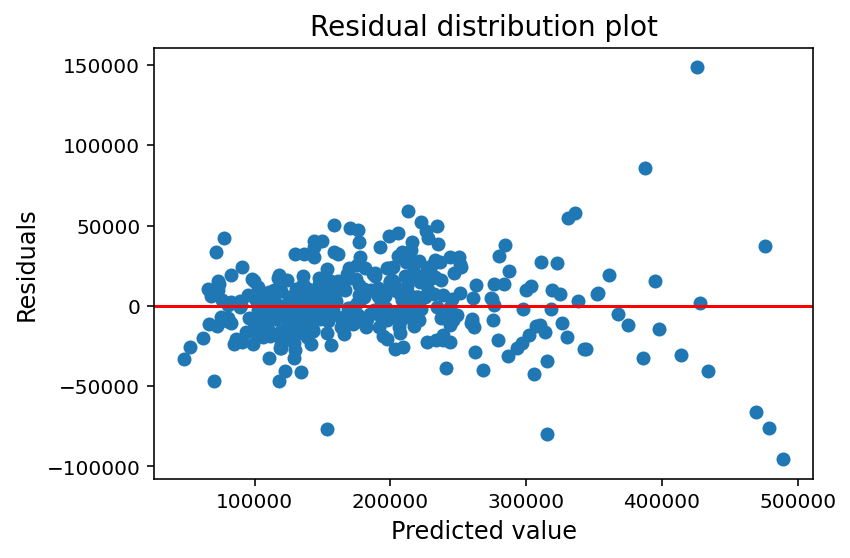

In [418]:
residual = pred - y_test

plt.scatter(pred, residual)
plt.axhline(0, linestyle='-', color='r')
plt.title('Residual distribution plot',fontsize=14)
plt.xlabel('Predicted value',fontsize=12)
plt.ylabel('Residuals',fontsize=12)

plt.tight_layout()

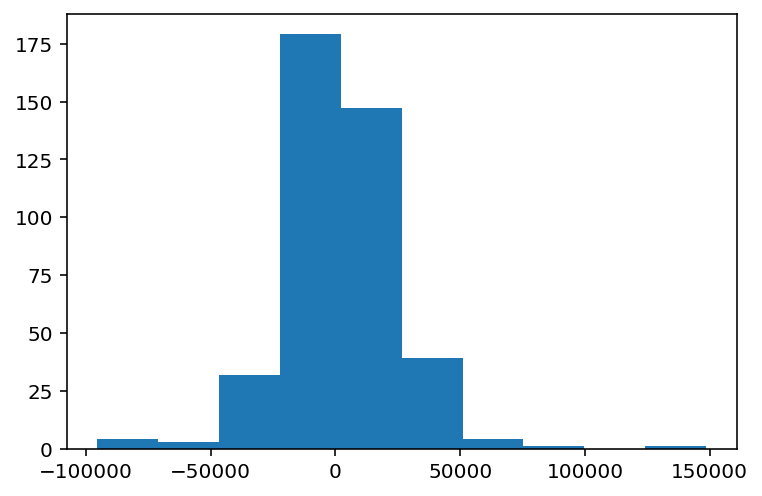

In [419]:
plt.hist(residual);

The residual plots above show generally equal distribution of variance with an exception of a few points, with the histogram plot following a normal distribution hence conforming to the assumptions of the multiple regression model. 

#### Prediction vs. Actual plot

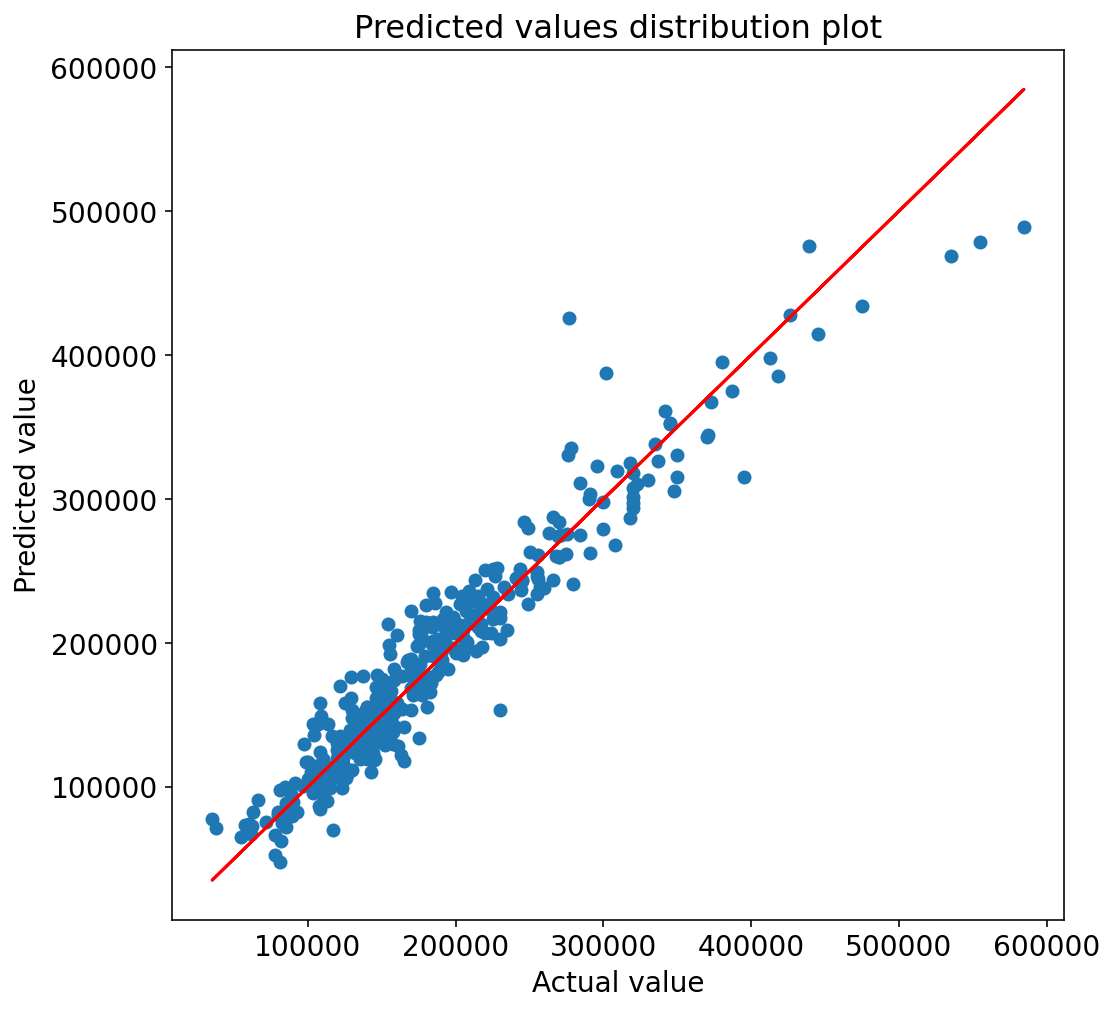

In [420]:
# Plot predicted values against actual values in test set
plt.figure(figsize=(8,8))

plt.scatter(x = y_test, y = pred);
plt.plot(y_test, y_test, color = 'r');

plt.xlabel('Actual value', size =14)
plt.ylabel("Predicted value", size = 14)
plt.title('Predicted values distribution plot',fontsize=16)

plt.xticks(size=14)
plt.yticks(size=14);

From the plot above, the prediction model performance looks strong shown by the scatter plots of the predictions falling very close to the actual values (shown by the diagonal red line), with only a few poor predictions at the higher end of the spectrum. The model also seems to be generally unbiased.  

In [421]:
# get list of coefficients that are not 0
coef_labels = [col for col in X_ss.columns if col != 'saleprice'] # column labels
enet_coef = pd.DataFrame(enet.coef_, index = coef_labels)              # get coefficients from best model
enet_coef = enet_coef[enet_coef[0] != 0]                                   # get non-zero coefficients
print(f'the model produced {enet_coef.shape[0]} non-zero coefficients.')

# sort by absolute values
enet_coef = enet_coef.reindex(enet_coef[0].abs().sort_values(ascending=True).index)


the model produced 190 non-zero coefficients.


In [422]:
# sort by absolute values
enet_coef = enet_coef.reindex(enet_coef[0].abs().sort_values(ascending=True).index)

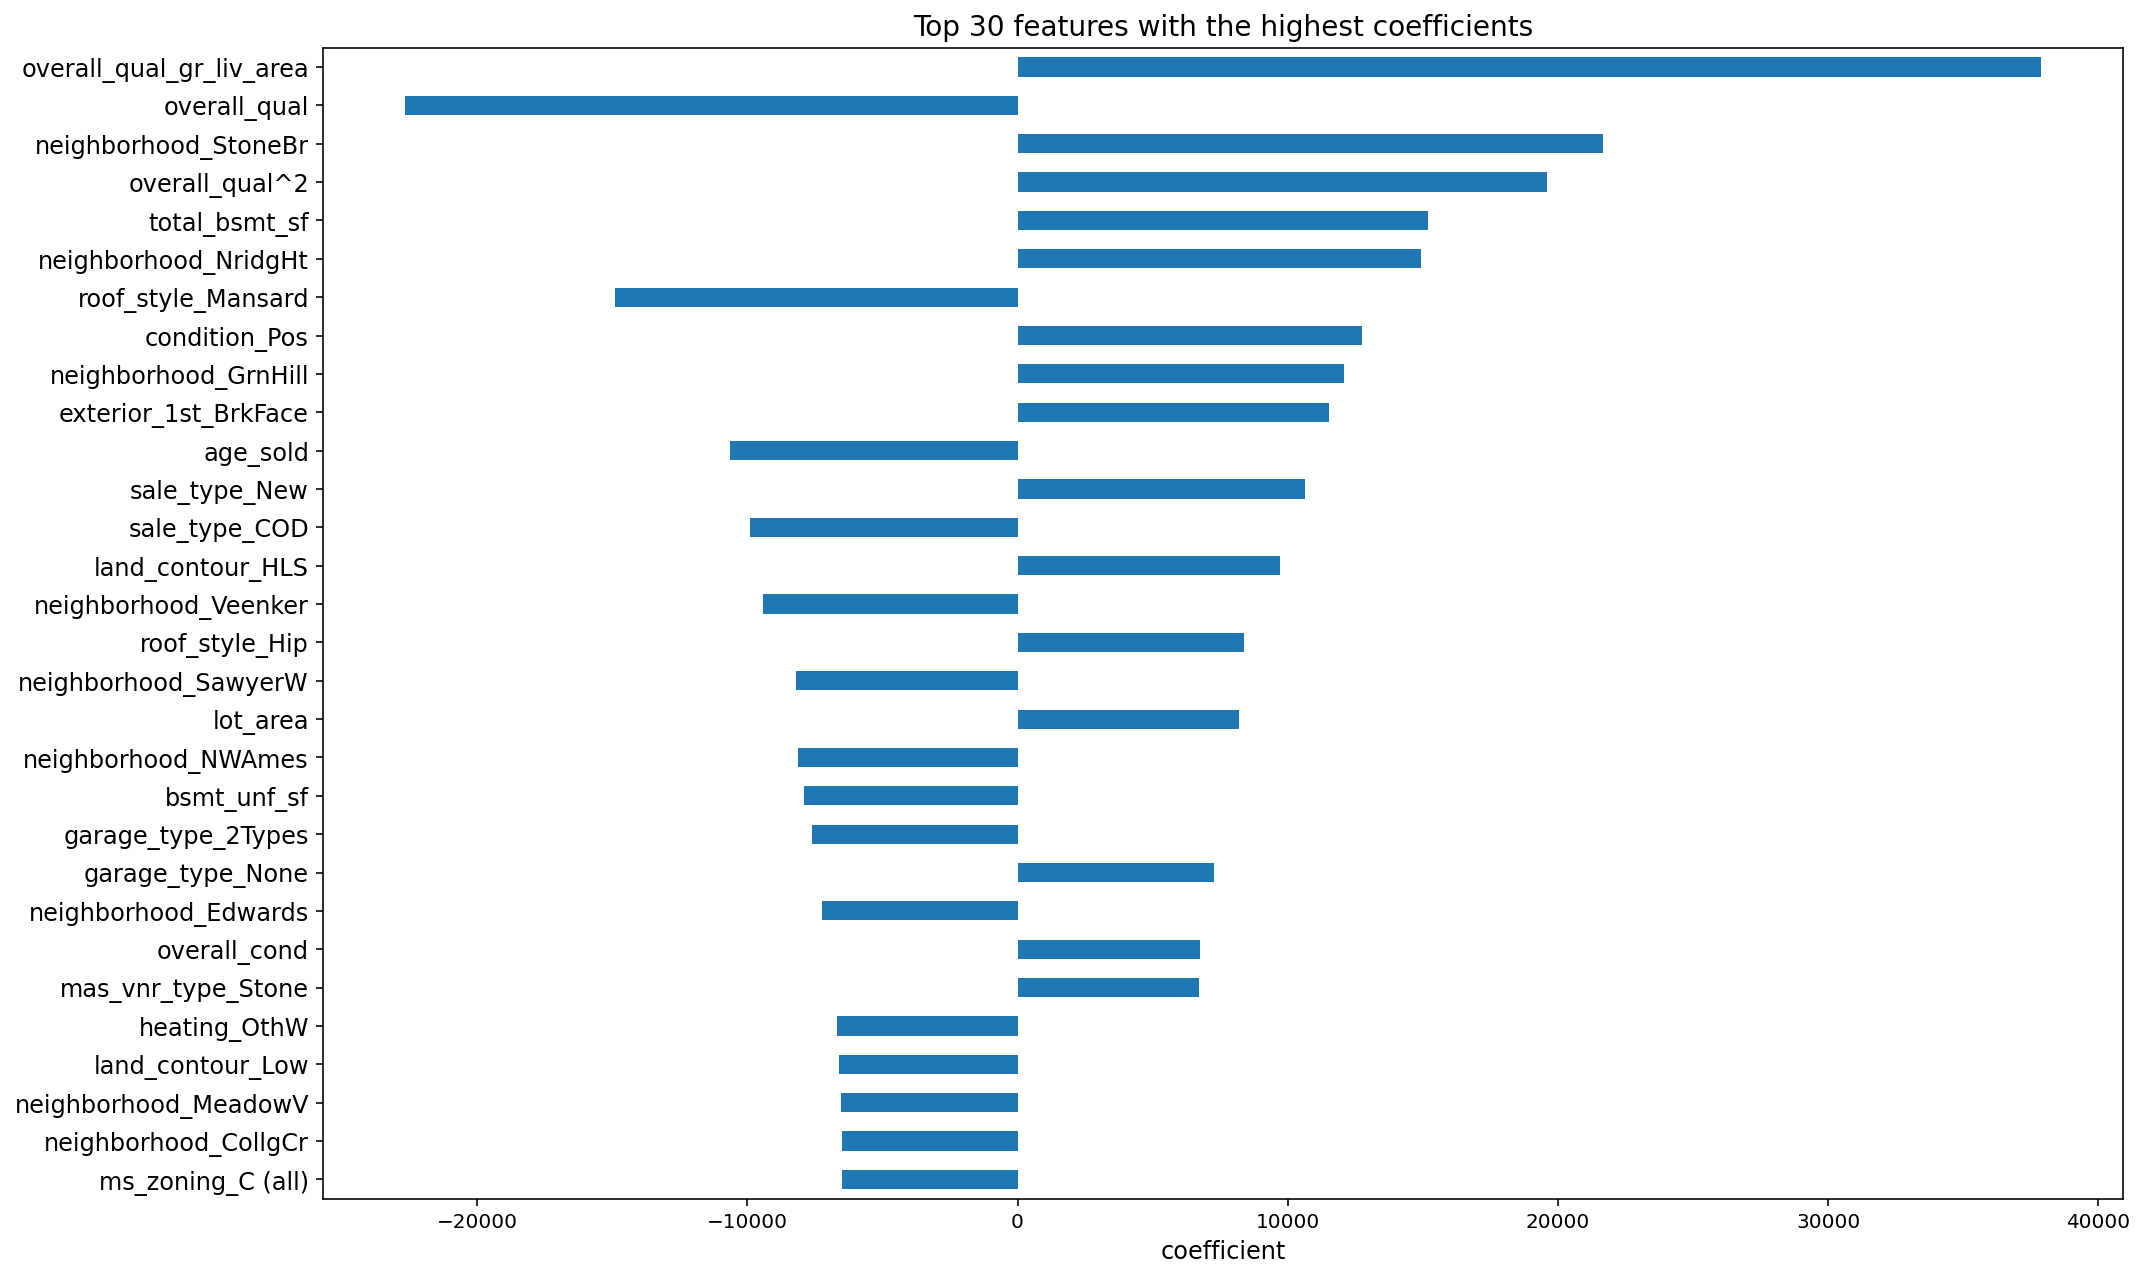

In [423]:
# plot top 30 coefficients
enet_coef.tail(30).plot.barh(figsize=(15,9), legend = None)
plt.title('Top 30 features with the highest coefficients',fontsize=14)
plt.xlabel('coefficient', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

## Kaggle Submission

In [424]:
# Fit whole training data
enet.fit(X_ss,y)

# Re-training score
enet.score(X_ss,y)

0.9366371462639376

In [425]:
test_num_cols = [col for col in df_test._get_numeric_data().columns if col != 'saleprice']

Xtest_num = df_test[test_num_cols]

In [426]:
# Add interaction between Overall Quality and Above Ground Living Area
Xtest_num['overall_qual_gr_liv_area'] = Xtest_num['overall_qual'] * Xtest_num['gr_liv_area']
# Add Square of Overall Quality
Xtest_num['overall_qual^2'] = Xtest_num['overall_qual'] * Xtest_num['overall_qual']

<ipython-input-426-170e49080265>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtest_num['overall_qual_gr_liv_area'] = Xtest_num['overall_qual'] * Xtest_num['gr_liv_area']
<ipython-input-426-170e49080265>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtest_num['overall_qual^2'] = Xtest_num['overall_qual'] * Xtest_num['overall_qual']


In [427]:
Xtest_cat = df_test.loc[:,df_test.dtypes==np.object]

In [428]:
Xtest = pd.concat([Xtest_num, Xtest_cat], axis=1)

In [430]:
# Standardize data
ss = StandardScaler()

Xtrain_sliced = ss.fit_transform(X_num[num_cols])
Xtest[num_cols] = ss.transform(Xtest[num_cols])

In [431]:
Xtest[num_cols]

id  lot_frontage  lot_area  overall_qual  overall_cond  \
0    1.403536     -0.023532 -0.133639     -0.076596      2.206173   
1    1.474620      0.463743 -0.054952     -0.780044     -1.414214   
2    1.114464     -0.547882  1.071177      0.626852     -0.509117   
3    0.610957     -0.452546 -0.227760     -0.780044      0.395980   
4   -1.005005      0.274611 -0.079466     -0.076596     -0.509117   
..        ...           ...       ...           ...           ...   
874  0.223553      0.500818 -0.306447     -0.076596      0.395980   
875 -0.283509      0.977500  0.702863     -0.076596      1.301076   
876 -0.118832     -0.690887 -0.268617     -0.780044     -0.509117   
877  0.235400     -0.452546 -0.155126     -1.483492      0.395980   
878  0.551721      0.024136 -0.245919     -0.780044     -0.509117   

     mas_vnr_area  exter_qual  bsmt_qual  bsmt_cond  bsmt_exposure  \
0       -0.568771   -0.690682  -1.652233   0.123717      -0.625916   
1       -0.568771   -0.690682   0.568091   0.123717      -0.625916   
2       -0.568771    1.015611   0.568091   1.871107       1.284480   
3       -0.568771    1.015611  -0.542071   0.123717      -0.625916   
4        0.867920   -0.690682   0.568091   0.123717      -0.625916   
..            ...         ...        ...        ...            ...   
874     -0.568771   -0.690682  -0.542071   0.123717      -0.625916   
875      1.816020    1.015611  -0.542071   0.123717      -0.625916   
876     -0.568771   -0.690682  -0.542071   0.123717      -0.625916   
877     -0.568771   -0.690682  -0.542071   0.123717      -0.625916   
878     -0.568771   -0.690682  -0.542071   0.123717      -0.625916   

     bsmtfin_type_1  bsmt_unf_sf  total_bsmt_sf  heating_qc  electrical  \
0         -1.205407     1.017021      -0.077626   -0.163091    7.315363   
1         -1.205407     3.144864       2.141249   -1.200387   -0.287714   
2          1.147503    -1.050156      -0.935185    0.874206   -0.287714   
3         -1.205407     0.900180      -0.199465   -1.200387   -0.287714   
4          0.206339     0.488992       0.798677   -0.163091   -0.287714   
..              ...          ...            ...         ...         ...   
874        0.676921    -1.274849       0.072329   -1.200387   -0.287714   
875        0.206339    -0.086223       0.119190    0.874206   -0.287714   
876        0.206339    -0.802994      -0.236954    0.874206   -0.287714   
877        0.676921    -0.717610      -0.443143   -1.200387   -0.287714   
878        0.206339    -0.982748      -0.304903   -1.200387   -0.287714   

     gr_liv_area  bsmt_full_bath  full_bath  half_bath  bedroom_abvgr  \
0       0.890640       -0.817473   0.770677  -0.739976       1.398469   
1       0.970932       -0.817473   0.770677  -0.739976       3.817441   
2       0.001254        1.100265   0.770677   1.256692       0.188982   
3      -1.085775       -0.817473  -1.049792  -0.739976      -1.020504   
4      -0.208741        1.100265  -1.049792   1.256692       0.188982   
..           ...             ...        ...        ...            ...   
874     0.785643        1.100265   0.770677   1.256692       1.398469   
875     1.014166       -0.817473   0.770677   1.256692       1.398469   
876    -0.585495       -0.817473  -1.049792  -0.739976       0.188982   
877    -1.299886       -0.817473  -1.049792  -0.739976       0.188982   
878    -1.174301        1.100265  -1.049792  -0.739976       0.188982   

     kitchen_abvgr  kitchen_qual  functional  fireplaces  fireplace_qu  \
0         4.559767     -2.281879   -0.229959   -0.927085     -0.975652   
1         4.559767     -0.776309   -0.229959   -0.927085     -0.975652   
2        -0.204724      0.729260   -0.229959    0.645964      1.238962   
3        -0.204724     -0.776309   -0.229959   -0.927085     -0.975652   
4        -0.204724     -0.776309   -0.229959    2.219012      1.238962   
..             ...           ...         ...         ...           ...   
874      -0.204724     -0.776309   -0.229959 

In [432]:
# one-hot encode categorical columns
Xtest_ss = pd.get_dummies(Xtest, drop_first = False)

In [433]:
Xtest_ss.shape

(879, 191)

In [434]:
Xtest_ss

id  lot_frontage  lot_area  overall_qual  overall_cond  \
0    1.403536     -0.023532 -0.133639     -0.076596      2.206173   
1    1.474620      0.463743 -0.054952     -0.780044     -1.414214   
2    1.114464     -0.547882  1.071177      0.626852     -0.509117   
3    0.610957     -0.452546 -0.227760     -0.780044      0.395980   
4   -1.005005      0.274611 -0.079466     -0.076596     -0.509117   
..        ...           ...       ...           ...           ...   
874  0.223553      0.500818 -0.306447     -0.076596      0.395980   
875 -0.283509      0.977500  0.702863     -0.076596      1.301076   
876 -0.118832     -0.690887 -0.268617     -0.780044     -0.509117   
877  0.235400     -0.452546 -0.155126     -1.483492      0.395980   
878  0.551721      0.024136 -0.245919     -0.780044     -0.509117   

     mas_vnr_area  exter_qual  bsmt_qual  bsmt_cond  bsmt_exposure  \
0       -0.568771   -0.690682  -1.652233   0.123717      -0.625916   
1       -0.568771   -0.690682   0.568091   0.123717      -0.625916   
2       -0.568771    1.015611   0.568091   1.871107       1.284480   
3       -0.568771    1.015611  -0.542071   0.123717      -0.625916   
4        0.867920   -0.690682   0.568091   0.123717      -0.625916   
..            ...         ...        ...        ...            ...   
874     -0.568771   -0.690682  -0.542071   0.123717      -0.625916   
875      1.816020    1.015611  -0.542071   0.123717      -0.625916   
876     -0.568771   -0.690682  -0.542071   0.123717      -0.625916   
877     -0.568771   -0.690682  -0.542071   0.123717      -0.625916   
878     -0.568771   -0.690682  -0.542071   0.123717      -0.625916   

     bsmtfin_type_1  bsmt_unf_sf  total_bsmt_sf  heating_qc  electrical  \
0         -1.205407     1.017021      -0.077626   -0.163091    7.315363   
1         -1.205407     3.144864       2.141249   -1.200387   -0.287714   
2          1.147503    -1.050156      -0.935185    0.874206   -0.287714   
3         -1.205407     0.900180      -0.199465   -1.200387   -0.287714   
4          0.206339     0.488992       0.798677   -0.163091   -0.287714   
..              ...          ...            ...         ...         ...   
874        0.676921    -1.274849       0.072329   -1.200387   -0.287714   
875        0.206339    -0.086223       0.119190    0.874206   -0.287714   
876        0.206339    -0.802994      -0.236954    0.874206   -0.287714   
877        0.676921    -0.717610      -0.443143   -1.200387   -0.287714   
878        0.206339    -0.982748      -0.304903   -1.200387   -0.287714   

     gr_liv_area  bsmt_full_bath  full_bath  half_bath  bedroom_abvgr  \
0       0.890640       -0.817473   0.770677  -0.739976       1.398469   
1       0.970932       -0.817473   0.770677  -0.739976       3.817441   
2       0.001254        1.100265   0.770677   1.256692       0.188982   
3      -1.085775       -0.817473  -1.049792  -0.739976      -1.020504   
4      -0.208741        1.100265  -1.049792   1.256692       0.188982   
..           ...             ...        ...        ...            ...   
874     0.785643        1.100265   0.770677   1.256692       1.398469   
875     1.014166       -0.817473   0.770677   1.256692       1.398469   
876    -0.585495       -0.817473  -1.049792  -0.739976       0.188982   
877    -1.299886       -0.817473  -1.049792  -0.739976       0.188982   
878    -1.174301        1.100265  -1.049792  -0.739976       0.188982   

     kitchen_abvgr  kitchen_qual  functional  fireplaces  fireplace_qu  \
0         4.559767     -2.281879   -0.229959   -0.927085     -0.975652   
1         4.559767     -0.776309   -0.229959   -0.927085     -0.975652   
2        -0.204724      0.729260   -0.229959    0.645964      1.238962   
3        -0.204724     -0.776309   -0.229959   -0.927085     -0.975652   
4        -0.204724     -0.776309   -0.229959    2.219012      1.238962   
..             ...           ...         ...         ...           ...   
874      -0.204724     -0.776309   -0.229959 

In [435]:
# Missing columns in test set as they might not contain all the variables.
# Find missing columns
missing_cols = set(X_ss.columns) - set(Xtest_ss.columns)
# Add missing columns to test set and fill in with 0
for i in missing_cols:
    Xtest_ss[i] = 0
# Make sure same columns
Xtest_ss = Xtest_ss[X_ss.columns]
#train.shape
Xtest_ss.shape

(879, 195)

(879, 2)


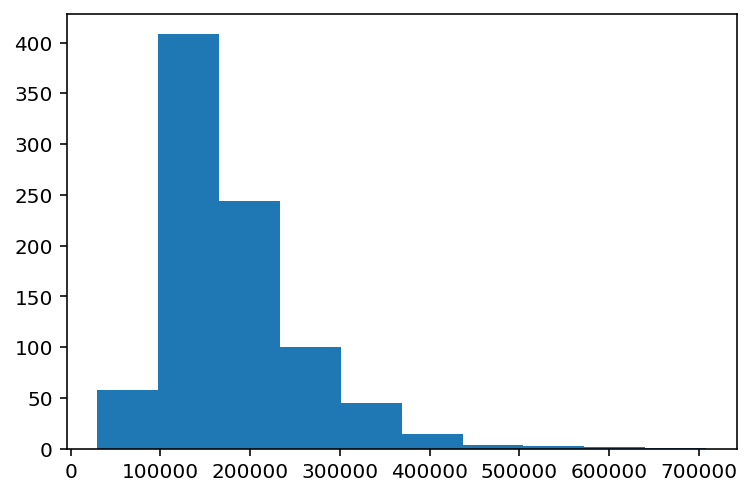

In [436]:
# Generate model predictions for test set
predictions = enet.predict(Xtest_ss)

# Plot histogram of predictions
plt.hist(predictions)

# Create submission csv in proper format
df_test['SalePrice'] = predictions

# check that there're 879 prediction rows
export = pd.DataFrame({'Id': df_test.id, 'SalePrice': predictions})
print(export.shape)
export.to_csv('../datasets/kaggle_submissions_24092020_EN_y_keepall.csv', index =False)

The RMSE scores when scored against the Kaggle test sets were **29488.30622 (Private)** and **24716.69808 (Public)**.  

## Conclusion & Recommendations

Four regression learning algorithms were evaluated in their predictive performance on housing sale price in Ames, USA. The ElasticNet regression model had the best predictive performance with a R-square of 91.9% and was able to identify the top features which impact sale price of houses in Ames.

**Overall quality** of the house in terms of material and finish, and above ground **living area and basement area (sq ft)** appear to add the most value to a home. Conversely, the **age of the property** and **Mansard roof style** appear to hurt the value of a home the most.

For home owners, they could consider the following to increase the value of their homes:

- renovating or remodelling the interior and exterior house to improve overall finish quality
- refurbishing the kitchen to improve its quality
- having a quality fireplace which would come in handy during winter season

For someone looking to buy a house for investment, they could consider looking at houses in the **Northridge Hts and Stone Brook neighbourhoods** which fetch higher sale value compared to the other neighbourhoods. In addition, houses located within **proximity of green belt, parks or amenities etc, and hilly terrain** would fetch higher prices as well.

The model may not generalize well to other cities as it captures only a small historical timeframe (2006 to 2010). Prices could have changed in recent ten years due to policy changes or inflation. In addtion, the living standards within USA cities could vary quite widely e.g. between coastal and inland states thus house value could differ quite substantially. 

To make the prediction model applicability more universal, the model could be revised to remove those specific features which only apply to Ames, e.g. neighbourhoods or engineering more universal features from the data. The model could also be enriched by collecting data from other cities in the same timeframe so that comparative analysis could be made.  